# ANÁLISIS DE ENFERMEDADES DEL CORAZÓN

**Fuente: Datos extraidos de la pagina Kaggle**
- Autor: Luis Edgar Gutierrez Saldaña 

**https://www.kaggle.com/code/neisha/heart-disease-prediction-using-logistic-regression**

#### 1 Cargando librerias

In [29]:
# Conexion a Google Colaborative
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [30]:
pip install featurewiz

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [31]:
100-28

72

In [32]:
#~~~~~~~~~~~~~~~~~~~#
# librerias basicas #
#~~~~~~~~~~~~~~~~~~~#
import pandas as pd 
import numpy as np
#~~~~~~~~~~~~~~~#
# visualizacion #
#~~~~~~~~~~~~~~~#
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
#~~~~~~~~~~~~~~~~~~~~~~~#
# analisis exploratorio #
#~~~~~~~~~~~~~~~~~~~~~~~#
from collections import Counter
import pandas_profiling as pp

#~~~~~~~~~~~~~~~~~~#
# preprocesamiento #
#~~~~~~~~~~~~~~~~~~#
from sklearn.preprocessing import StandardScaler
#~~~~~~~~~~~#
# particion #
#~~~~~~~~~~~#
from sklearn.model_selection import train_test_split
#~~~~~~~~~~#
# metricas #
#~~~~~~~~~~#
from sklearn.metrics import confusion_matrix,accuracy_score,roc_curve,classification_report
#~~~~~~~~~#
# modelos #
#~~~~~~~~~#
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
#~~~~~~~~~~~~~~~~~~~~~~~~#
# seleccion de variables #
#~~~~~~~~~~~~~~~~~~~~~~~~#
from featurewiz import featurewiz
#~~~~~~~~~~#
# emsamble #
#~~~~~~~~~~#
import six 
import sys
sys.modules['sklearn.externals.six'] = six
from mlxtend.classifier import StackingCVClassifier

#### 2 Cargando Datos

In [33]:
#------#
# ruta #
#------#

In [34]:
d=pd.read_csv("/content/drive/MyDrive/13_PROYECTOS/5_proyecto_Heart_Disease_Ensemble_Classifier/EnfermedadCardioVasculares.csv")

In [35]:
d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4238 entries, 0 to 4237
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4238 non-null   int64  
 1   age              4238 non-null   int64  
 2   education        4133 non-null   float64
 3   currentSmoker    4238 non-null   int64  
 4   cigsPerDay       4209 non-null   float64
 5   BPMeds           4185 non-null   float64
 6   prevalentStroke  4238 non-null   int64  
 7   prevalentHyp     4238 non-null   int64  
 8   diabetes         4238 non-null   int64  
 9   totChol          4188 non-null   float64
 10  sysBP            4238 non-null   float64
 11  diaBP            4238 non-null   float64
 12  BMI              4219 non-null   float64
 13  heartRate        4237 non-null   float64
 14  glucose          3850 non-null   float64
 15  TenYearCHD       4238 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 529.9 KB


In [36]:
d.isna().sum()

male                 0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

In [37]:
print('numericas:',len(d.select_dtypes(['int','float']).columns))
print('categoricas:',len(d.select_dtypes(exclude=['int','float']).columns))

numericas: 16
categoricas: 0


In [38]:
d.describe()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,4238.000000,4238.000000,4133.000000,4238.000000,4209.000000,4185.000000,4238.000000,4238.000000,4238.000000,4188.000000,4238.000000,4238.000000,4219.000000,4237.000000,3850.000000,4238.000000
mean,0.429212,49.584946,1.978950,0.494101,9.003089,0.029630,0.005899,0.310524,0.025720,236.721585,132.352407,82.893464,25.802008,75.878924,81.966753,0.151958
std,0.495022,8.572160,1.019791,0.500024,11.920094,0.169584,0.076587,0.462763,0.158316,44.590334,22.038097,11.910850,4.080111,12.026596,23.959998,0.359023
min,0.000000,32.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.500000,48.000000,15.540000,44.000000,40.000000,0.000000
25%,0.000000,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.000000,75.000000,23.070000,68.000000,71.000000,0.000000
50%,0.000000,49.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.000000,82.000000,25.400000,75.000000,78.000000,0.000000
75%,1.000000,56.000000,3.000000,1.000000,20.000000,0.000000,0.000000,1.000000,0.000000,263.000000,144.000000,89.875000,28.040000,83.000000,87.000000,0.000000
max,1.000000,70.000000,4.000000,1.000000,70.000000,1.000000,1.000000,1.000000,1.000000,696.000000,295.000000,142.500000,56.800000,143.000000,394.000000,1.000000


In [39]:
d.columns

Index(['male', 'age', 'education', 'currentSmoker', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD'],
      dtype='object')

In [40]:
d.rename(columns={'male':"sexo",
                  'age':"edad",
                  'education':"educacion",
                  "currentSmoker":"fumador",
                  "cigsPerDay":"cigarros_por_dia",
                  'BPMeds':"toma_medicamentos",
                  'prevalentStroke':"ictus_prevalente",
                  "diabetes":'diabetes',
                  'totChol':"nivel_de_colesterol",
                  'sysBP':"presion_arterial_sistolica",
                  'diaBP':"presion_arterial_diastolica",
                  'BMI':"imc",
                  'heartRate':"frecuencia_cardiaca",
                  'glucose':"glucosa",
                  'TenYearCHD':"target"},inplace=True)

In [41]:
d.sexo.value_counts() 

0    2419
1    1819
Name: sexo, dtype: int64

In [42]:
d['sexo']=d['sexo'].map({
    0:'hombre',
    1:'mujer'
})

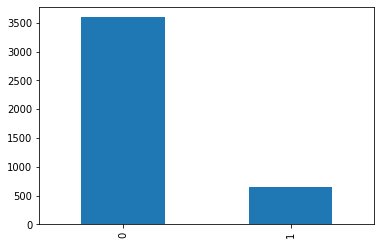

In [43]:
import matplotlib.pyplot as plt
d.target.value_counts().plot.bar()

In [44]:
d.dtypes.value_counts() 

float64    9
int64      6
object     1
dtype: int64

In [45]:
d.shape

(4238, 16)

In [46]:
d.nunique()

sexo                              2
edad                             39
educacion                         4
fumador                           2
cigarros_por_dia                 33
toma_medicamentos                 2
ictus_prevalente                  2
prevalentHyp                      2
diabetes                          2
nivel_de_colesterol             248
presion_arterial_sistolica      234
presion_arterial_diastolica     146
imc                            1363
frecuencia_cardiaca              73
glucosa                         143
target                            2
dtype: int64

In [47]:
#------------------------------------#
# discretizacion de la variable edad #
#------------------------------------#

# continuo a categorico


#x = d.edad
#s = pd.Series(x)
edad= pd.cut (d.edad, bins = [30,45,60,75],labels=['edad_c1','edad_c2','edad_c3'])
d['edad_discre']=edad

In [48]:
d['edad_discre'].describe()

count        4238
unique          3
top       edad_c2
freq         2072
Name: edad_discre, dtype: object

In [49]:
d['edad_discre']=d['edad_discre'].map({
    'edad_c2':2,
    'edad_c1':1,
    'edad_c3':3 
})

In [50]:
# comentario:
#------------

# Por el cardinal podemos intuir que la variable debe ser cualitativa(float64 >> int64)


In [51]:
d['sexo'].value_counts()

hombre    2419
mujer     1819
Name: sexo, dtype: int64

#### 3 Analisis Exploratorio

In [52]:
#------------------#
# eda exploratorio #
#------------------# 

**univariado !!**

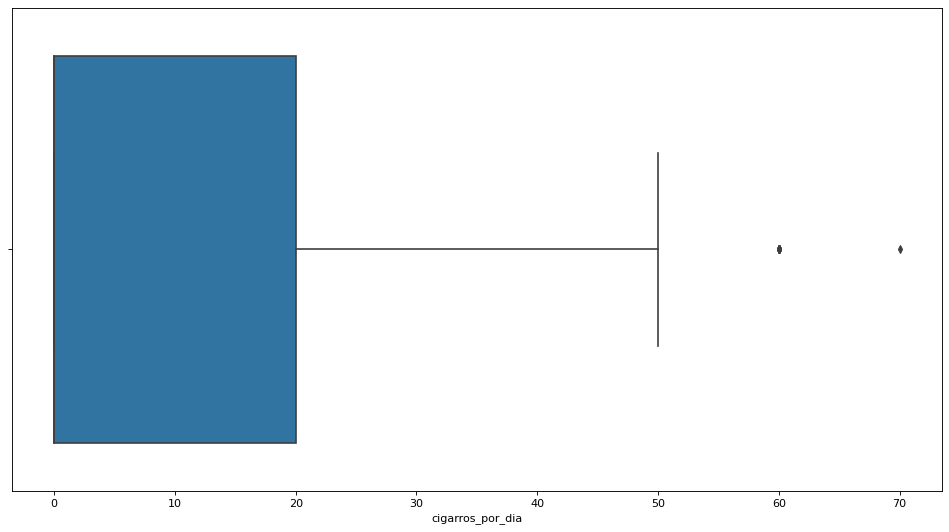

In [53]:
plt.figure(figsize=(15,8), dpi=80)
sns.boxplot(d['cigarros_por_dia'])
plt.show()
#plt.title('cigarros_por_dia')

In [27]:
d['cigarros_por_dia'].describe()

count    4209.000000
mean        9.003089
std        11.920094
min         0.000000
25%         0.000000
50%         0.000000
75%        20.000000
max        70.000000
Name: cigarros_por_dia, dtype: float64

Text(0.5, 1.0, 'nivel_de_colesterol')

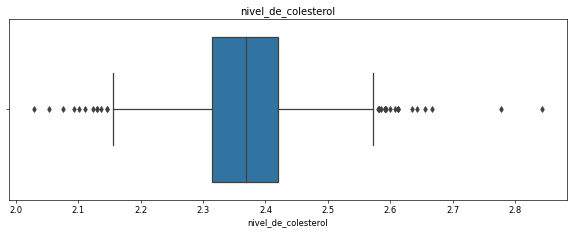

In [ ]:
plt.figure(figsize=(12,4), dpi=60)
sns.boxplot(np.log10(d['nivel_de_colesterol']))
plt.title('nivel_de_colesterol')

In [ ]:
d['nivel_de_colesterol'].describe()

count    4188.000000
mean      236.721585
std        44.590334
min       107.000000
25%       206.000000
50%       234.000000
75%       263.000000
max       696.000000
Name: nivel_de_colesterol, dtype: float64

Text(0.5, 1.0, 'presion_arterial_sistolica')

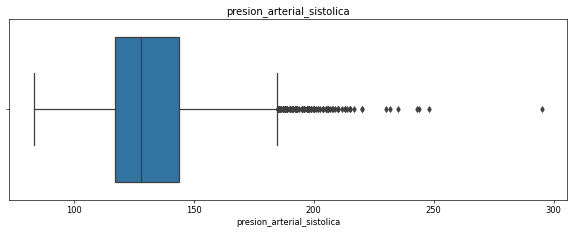

In [ ]:
plt.figure(figsize=(12,4), dpi=60)
sns.boxplot(d['presion_arterial_sistolica'])
plt.title('presion_arterial_sistolica')

In [ ]:
d['presion_arterial_sistolica'].describe()

count    4238.000000
mean      132.352407
std        22.038097
min        83.500000
25%       117.000000
50%       128.000000
75%       144.000000
max       295.000000
Name: presion_arterial_sistolica, dtype: float64

Text(0.5, 1.0, 'presion_arterial_diastolica')

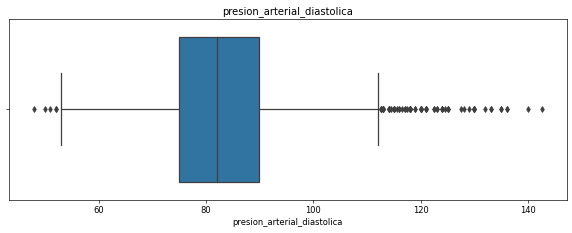

In [ ]:
plt.figure(figsize=(12,4), dpi=60)
sns.boxplot(d['presion_arterial_diastolica'])
plt.title('presion_arterial_diastolica')

In [ ]:
d['presion_arterial_diastolica'].describe()

count    4238.000000
mean       82.893464
std        11.910850
min        48.000000
25%        75.000000
50%        82.000000
75%        89.875000
max       142.500000
Name: presion_arterial_diastolica, dtype: float64

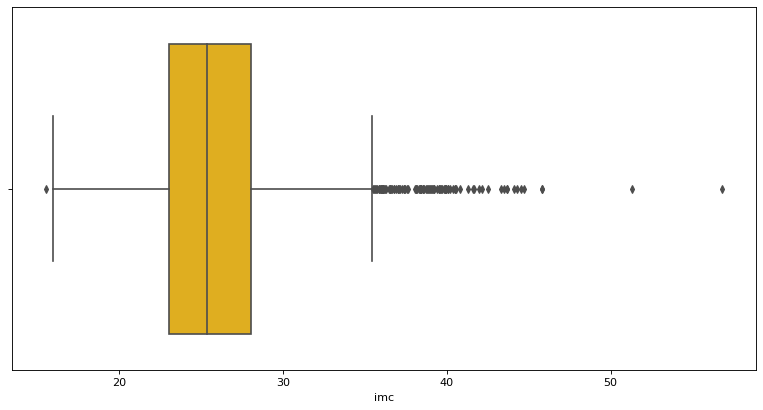

In [ ]:
plt.figure(figsize=(12,6), dpi=80)
sns.boxplot((d['imc']),data=d,palette="Wistia_r")#np.log10
plt.show()
#plt.title('imc')

In [ ]:
d['imc'].describe()

count    4219.000000
mean       25.802008
std         4.080111
min        15.540000
25%        23.070000
50%        25.400000
75%        28.040000
max        56.800000
Name: imc, dtype: float64

Text(0.5, 1.0, 'frecuencia_cardiaca')

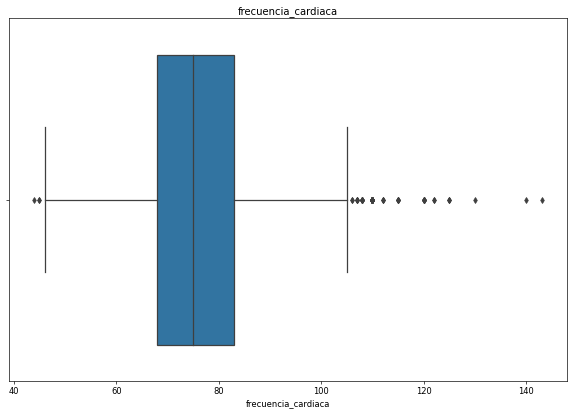

In [ ]:
plt.figure(figsize=(12,8), dpi=60)
sns.boxplot(d['frecuencia_cardiaca'])
plt.title('frecuencia_cardiaca')

conclusiones:
- El 50% de personas, el consumo de cigarros es mayor o igual a 20 cigarros

- El 50% de personas su presion arterial sistolica es menor o igual a 128

- El 50% de personas su indice masa corporal es menor o igual 25

 **bivariado !!**

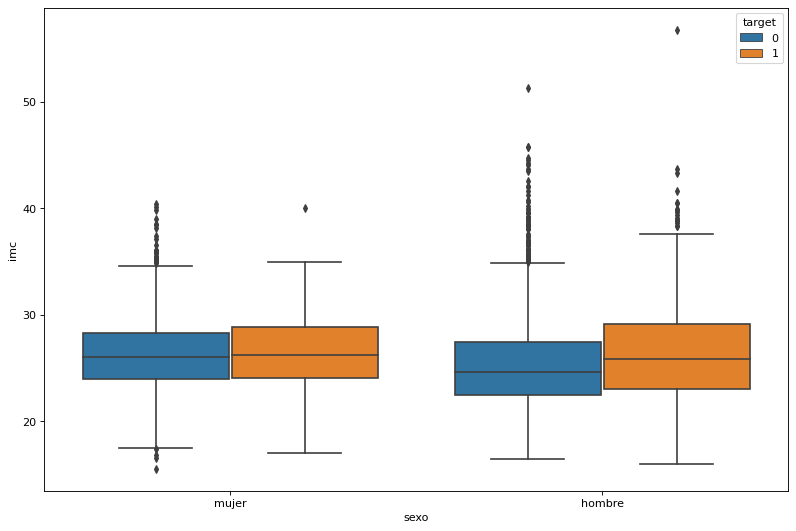

In [ ]:
plt.figure(figsize=(12,8), dpi=80)
sns.boxplot(x='sexo',y='imc',hue='target',data=d)
#plt.title('sexo vs imc')
plt.show()

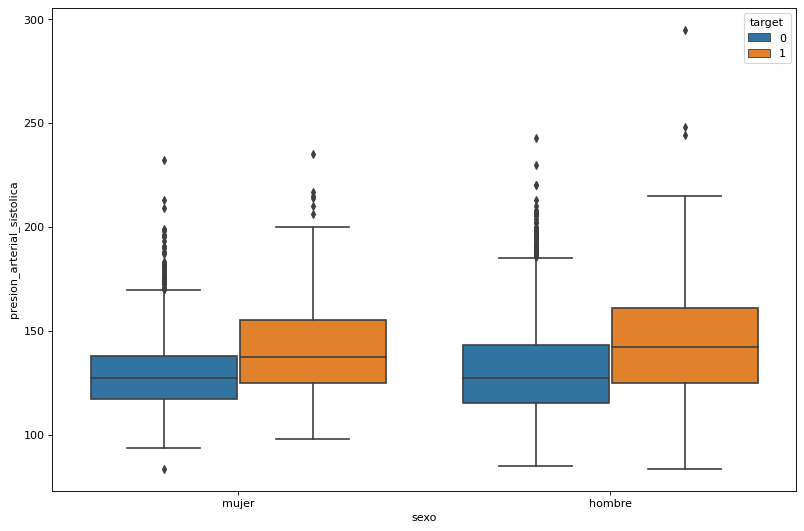

In [ ]:
plt.figure(figsize=(12,8), dpi=80)
sns.boxplot(x='sexo',y='presion_arterial_sistolica',hue='target',data=d)
#plt.title('sexo vs presion_arterial_sistolica')

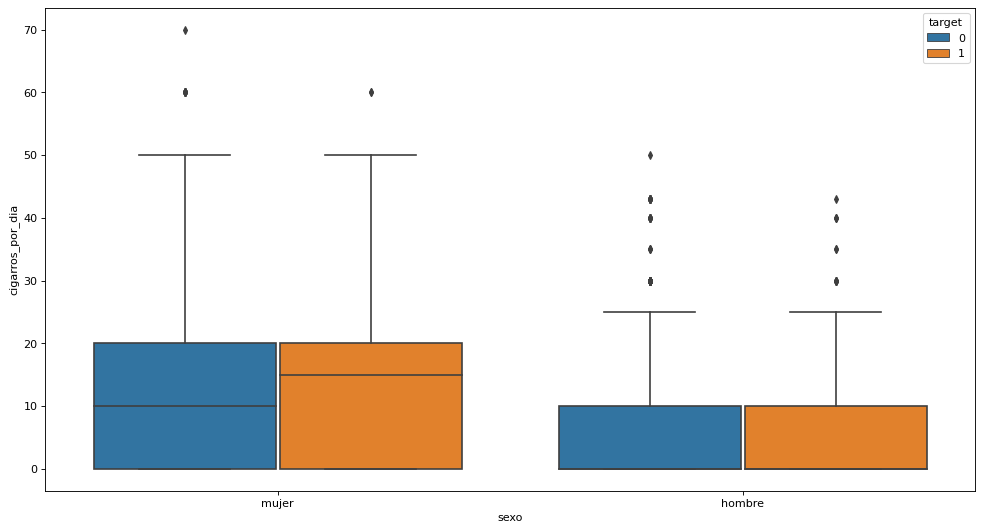

In [ ]:
plt.figure(figsize=(15,8), dpi=80)
sns.boxplot(x='sexo',y='cigarros_por_dia',hue='target',data=d)
#plt.title('sexo vs cigarros_por_dia')
plt.show()

Text(0.5, 1.0, 'edad vs presion_arterial_sistolica')

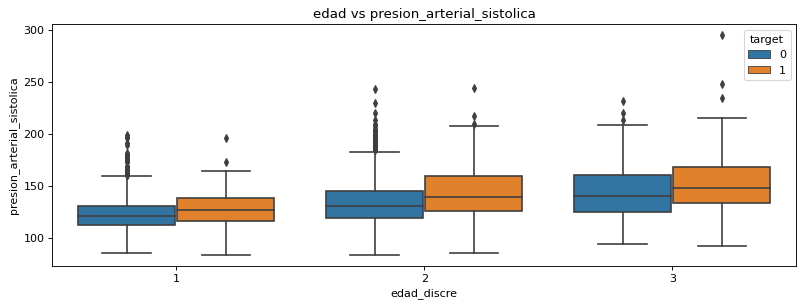

In [ ]:
plt.figure(figsize=(12,4), dpi=80)
sns.boxplot(x='edad_discre',y='presion_arterial_sistolica',hue='target',data=d)
plt.title('edad vs presion_arterial_sistolica')

Text(0.5, 1.0, 'edad vs imc')

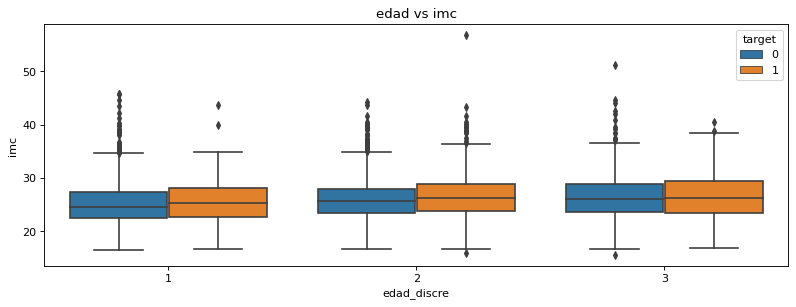

In [ ]:
plt.figure(figsize=(12,4), dpi=80)
sns.boxplot(x='edad_discre',y='imc',hue='target',data=d)
plt.title('edad vs imc')

##### Variable Edad

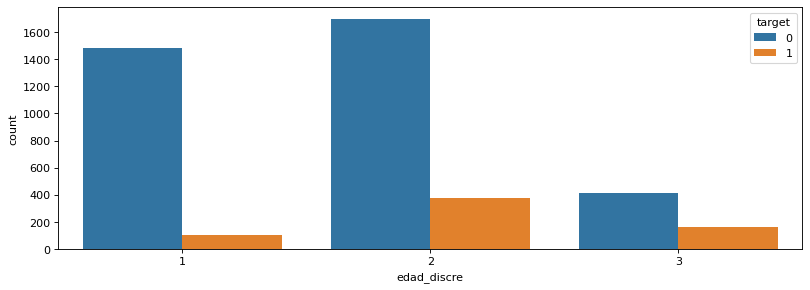

In [ ]:
plt.figure(figsize=(12,4), dpi=80)
sns.countplot(x='edad_discre',hue='target',data=d)

In [ ]:
cat3=d[d['edad_discre']==3]

In [ ]:
print('0',len(cat3[cat3['target']==0]))
print('1',len(cat3[cat3['target']==1]))

0 414
1 165


In [ ]:
165/(414+165)*100

28.497409326424872

In [ ]:
pd.pivot_table(d,index='edad_discre',aggfunc={'target':'mean'})*100

,target
edad_discre,
1,6.679269
2,18.001931
3,28.497409


In [ ]:
100-18

82

##### Variable Sexo


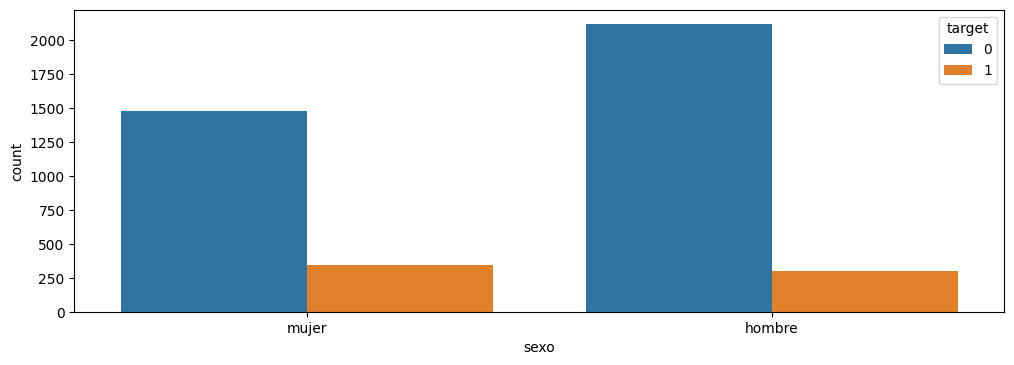

In [ ]:
plt.figure(figsize=(12,4), dpi=100)
sns.countplot(x='sexo',hue='target',data=d)
plt.show()

In [ ]:
pd.pivot_table(d,index='sexo',aggfunc={'target':'mean'})*100

,target
sexo,
hombre,12.443158
mujer,18.856515


In [ ]:
100-18

82

In [ ]:
100-12

88

##### Variable Educacion

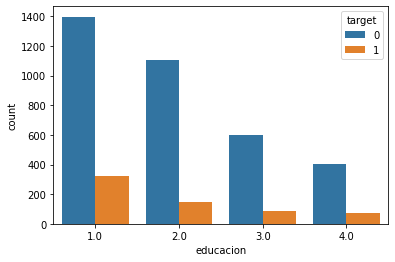

In [ ]:
sns.countplot (x='educacion',hue='target',data=d)

##### Variable Fumador

In [ ]:
d['fumador'].value_counts()

0    2144
1    2094
Name: fumador, dtype: int64

In [ ]:
plt.figure(figsize=(12,4), dpi=100)
pd.pivot_table(d,index='fumador',aggfunc={'target':'mean'})*100

,target
fumador,
0,14.505597
1,15.902579


<Figure size 1200x400 with 0 Axes>

In [ ]:
100-15

85

In [ ]:
d['fumador']=d['fumador'].map({
    0:'no',
    1:'si'
})

In [ ]:
100-14

86

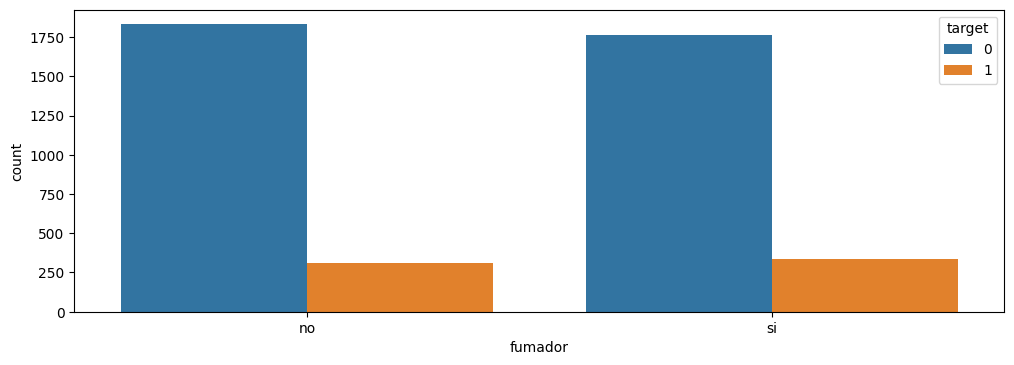

In [ ]:
plt.figure(figsize=(12,4), dpi=100)
sns.countplot(x='fumador',hue='target',data=d)

##### Variable toma medicamentos

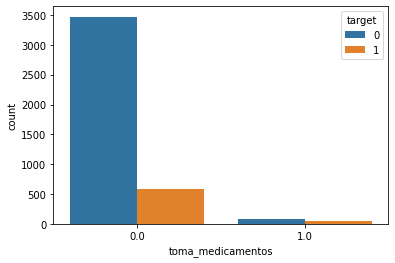

In [ ]:
sns.countplot(x='toma_medicamentos',hue='target',data=d)

##### Variable ictus prevalente

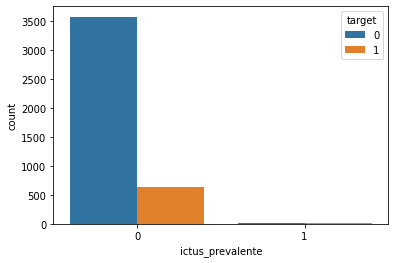

In [ ]:
sns.countplot(x='ictus_prevalente',hue='target',data=d)

##### Variable prevalentHyp

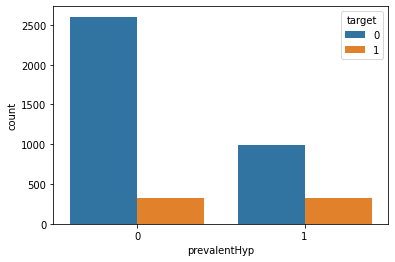

In [ ]:
sns.countplot(x='prevalentHyp',hue='target',data=d)

##### Variable diabetes

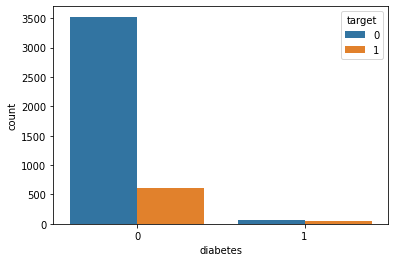

In [ ]:
sns.countplot(x='diabetes',hue='target',data=d)

##### Matriz de correlaciones

In [ ]:
d.dtypes

sexo                             object
edad                              int64
educacion                       float64
fumador                          object
cigarros_por_dia                float64
toma_medicamentos               float64
ictus_prevalente                  int64
prevalentHyp                      int64
diabetes                          int64
nivel_de_colesterol             float64
presion_arterial_sistolica      float64
presion_arterial_diastolica     float64
imc                             float64
frecuencia_cardiaca             float64
glucosa                         float64
target                            int64
edad_discre                    category
dtype: object

In [ ]:
corr_df = d.corr(method='pearson')
corr_df.style.background_gradient(cmap='YlOrRd')

,edad,educacion,cigarros_por_dia,toma_medicamentos,ictus_prevalente,prevalentHyp,diabetes,nivel_de_colesterol,presion_arterial_sistolica,presion_arterial_diastolica,imc,frecuencia_cardiaca,glucosa,target
edad,1.000000,-0.165883,-0.192791,0.122995,0.057655,0.307194,0.101258,0.262131,0.394302,0.206104,0.135800,-0.012823,0.122256,0.225256
educacion,-0.165883,1.000000,0.008085,-0.010815,-0.035112,-0.081970,-0.038680,-0.023115,-0.129631,-0.062316,-0.137504,-0.054206,-0.035721,-0.054059
cigarros_por_dia,-0.192791,0.008085,1.000000,-0.046134,-0.032707,-0.066146,-0.037067,-0.026320,-0.088780,-0.056632,-0.092856,0.075157,-0.058960,0.057884
toma_medicamentos,0.122995,-0.010815,-0.046134,1.000000,0.117365,0.261187,0.052047,0.080558,0.254219,0.194227,0.100668,0.015233,0.051176,0.087489
ictus_prevalente,0.057655,-0.035112,-0.032707,0.117365,1.000000,0.074830,0.006949,0.000067,0.057009,0.045190,0.025891,-0.017676,0.018431,0.061810
prevalentHyp,0.307194,-0.081970,-0.066146,0.261187,0.074830,1.000000,0.077808,0.163993,0.696755,0.615751,0.301318,0.147261,0.086834,0.177603
diabetes,0.101258,-0.038680,-0.037067,0.052047,0.006949,0.077808,1.000000,0.040278,0.111283,0.050329,0.087036,0.048994,0.617627,0.097317
nivel_de_colesterol,0.262131,-0.023115,-0.026320,0.080558,0.000067,0.163993,0.040278,1.000000,0.208908,0.165182,0.115767,0.091125,0.046408,0.082184
presion_arterial_sistolica,0.394302,-0.129631,-0.088780,0.254219,0.057009,0.696755,0.111283,0.208908,1.000000,0.784002,0.326981,0.182246,0.140621,0.216429
presion_arterial_diastolica,0.206104,-0.062316,-0.056632,0.194227,0.045190,0.615751,0.050329,0.165182,0.784002,1.000000,0.377588,0.181255,0.061231,0.145299


#### 4 Tratamiento de Valores Perdidos

In [ ]:
d.dtypes.value_counts()

float64     9
int64       5
object      2
category    1
dtype: int64

In [ ]:
d.drop(columns=['edad_discre'],inplace=True)

In [ ]:
lista_numericas=[]
lista_categoricas=[]
for i in d.columns:
  if d[i].dtypes=='object':
      lista_categoricas.append(i)
  else:
      lista_numericas.append(i)    
print('lista_numericas :',lista_numericas    )  
print('lista_categoricas :',lista_categoricas    )  

lista_numericas : ['edad', 'educacion', 'cigarros_por_dia', 'toma_medicamentos', 'ictus_prevalente', 'prevalentHyp', 'diabetes', 'nivel_de_colesterol', 'presion_arterial_sistolica', 'presion_arterial_diastolica', 'imc', 'frecuencia_cardiaca', 'glucosa', 'target']
lista_categoricas : ['sexo', 'fumador']


In [ ]:
d['educacion'].value_counts()

1.0    1720
2.0    1253
3.0     687
4.0     473
Name: educacion, dtype: int64

In [ ]:
d.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
sexo,4238,2,hombre,2419,NaN,NaN,NaN,NaN,NaN,NaN,NaN
edad,4238.0,NaN,NaN,NaN,49.584946,8.57216,32.0,42.0,49.0,56.0,70.0
educacion,4133.0,NaN,NaN,NaN,1.97895,1.019791,1.0,1.0,2.0,3.0,4.0
fumador,4238,2,no,2144,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cigarros_por_dia,4209.0,NaN,NaN,NaN,9.003089,11.920094,0.0,0.0,0.0,20.0,70.0
toma_medicamentos,4185.0,NaN,NaN,NaN,0.02963,0.169584,0.0,0.0,0.0,0.0,1.0
ictus_prevalente,4238.0,NaN,NaN,NaN,0.005899,0.076587,0.0,0.0,0.0,0.0,1.0
prevalentHyp,4238.0,NaN,NaN,NaN,0.310524,0.462763,0.0,0.0,0.0,1.0,1.0
diabetes,4238.0,NaN,NaN,NaN,0.02572,0.158316,0.0,0.0,0.0,0.0,1.0
nivel_de_colesterol,4188.0,NaN,NaN,NaN,236.721585,44.590334,107.0,206.0,234.0,263.0,696.0


In [ ]:
d.glucosa.isnull().sum()

388

In [ ]:
#---------#
# mediana #
#---------#
for i in d[lista_numericas]:
   d[i]=d[i].fillna(d[i].median())


In [ ]:
d[lista_numericas].isnull().sum()

edad                           0
educacion                      0
cigarros_por_dia               0
toma_medicamentos              0
ictus_prevalente               0
prevalentHyp                   0
diabetes                       0
nivel_de_colesterol            0
presion_arterial_sistolica     0
presion_arterial_diastolica    0
imc                            0
frecuencia_cardiaca            0
glucosa                        0
target                         0
dtype: int64

In [ ]:
d.isna().sum()

sexo                           0
edad                           0
educacion                      0
fumador                        0
cigarros_por_dia               0
toma_medicamentos              0
ictus_prevalente               0
prevalentHyp                   0
diabetes                       0
nivel_de_colesterol            0
presion_arterial_sistolica     0
presion_arterial_diastolica    0
imc                            0
frecuencia_cardiaca            0
glucosa                        0
target                         0
dtype: int64

In [ ]:
 d[lista_categoricas].isnull().any()

sexo       False
fumador    False
dtype: bool

In [ ]:
#------------------#
# data total final #
#------------------#
d.isnull().sum()

sexo                           0
edad                           0
educacion                      0
fumador                        0
cigarros_por_dia               0
toma_medicamentos              0
ictus_prevalente               0
prevalentHyp                   0
diabetes                       0
nivel_de_colesterol            0
presion_arterial_sistolica     0
presion_arterial_diastolica    0
imc                            0
frecuencia_cardiaca            0
glucosa                        0
target                         0
dtype: int64

In [ ]:
d.target.value_counts()

0    3594
1     644
Name: target, dtype: int64

In [ ]:
 
d.target.dtypes
# convirtiendo de numerico a categorico
#
#d.target=d.target.map({0:'0',
#                     0:'1'})


dtype('int64')

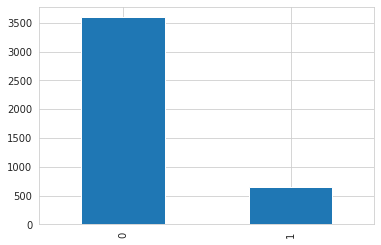

In [ ]:
d.target.value_counts().plot.bar()

In [ ]:
lista_numericas

['cigarros_por_dia',
 'nivel_de_colesterol',
 'presion_arterial_sistolica',
 'presion_arterial_diastolica',
 'imc',
 'frecuencia_cardiaca',
 'glucosa']

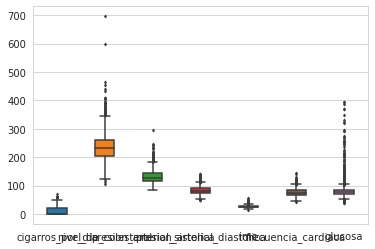

In [ ]:
#---------#
# seaborn #
#---------#
sns.boxplot(data = d[lista_numericas],orient="v",fliersize=2,saturation=.90, width=0.4)

In [ ]:
d[lista_categoricas].columns

Index(['sexo', 'edad', 'educacion', 'fumador', 'toma_medicamentos',
       'ictus_prevalente', 'prevalentHyp', 'diabetes', 'target'],
      dtype='object')

#### 5 Tratamiento de Outliers

##### variable glucosa !! 

In [ ]:
########## 
# paso 1 #
##########

# Creamos una funcion para poder visualizar los percentiles
def Cuantiles(lista):
    c = [0,1,5,10,20,30,40,50,60,70,80,90,92.5,95,97.5,99,100]
    matrix = pd.concat([pd.DataFrame(c),pd.DataFrame(np.percentile(lista.dropna(),c))],axis = 1)
    matrix.columns = ["Cuantil","Valor_Cuantil"]
    return(matrix)

########## 
# paso 2 #
##########

# Analizamos las variables numericas
# Variable
Cuantiles(d["glucosa"]).transpose()

########## 
# paso 3 #
##########

cuantil_1=np.percentile(d["glucosa"],1)
cuantil_1

cuantil_95= np.percentile(d["glucosa"],95)
cuantil_95

## ApplicantIncome
cuantil_1 = np.percentile(d["glucosa"],1)
cuantil_95 = np.percentile(d["glucosa"],95)
print(cuantil_1)
print(cuantil_95)

########## 
# paso 4 #
##########
# Reemplazamos el valor minimo y maximo
d.loc[d["glucosa"]<cuantil_1,"glucosa"] = cuantil_1
d.loc[d["glucosa"]>cuantil_95,"glucosa"] = cuantil_95#toda variable asimetrica se presta para sacarle logaritmo asi se vuelve mas interesante
##########
# paso 5 #
##########

Cuantiles(d["glucosa"]).transpose()

56.0
107.0


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
Cuantil,0.0,1.0,5.0,10.0,20.0,30.0,40.0,50.0,60.0,70.0,80.0,90.0,92.5,95.0,97.5,99.0,100.0
Valor_Cuantil,56.0,56.0,62.0,66.0,70.0,74.0,76.0,78.0,80.0,84.0,88.0,97.0,100.0,107.0,107.0,107.0,107.0


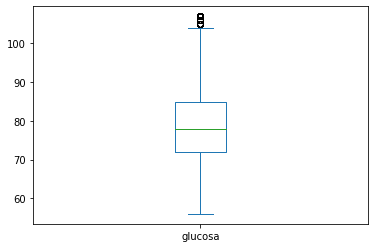

In [ ]:
d.glucosa.plot(kind="box")

##### variable frecuencia_cardiaca

In [ ]:
########## 
# paso 1 #
##########

# Creamos una funcion para poder visualizar los percentiles
def Cuantiles(lista):
    c = [0,1,5,10,20,30,40,50,60,70,80,90,92.5,95,97.5,99,100]
    matrix = pd.concat([pd.DataFrame(c),pd.DataFrame(np.percentile(lista.dropna(),c))],axis = 1)
    matrix.columns = ["Cuantil","Valor_Cuantil"]
    return(matrix)

########## 
# paso 2 #
##########

# Analizamos las variables numericas
# Variable
Cuantiles(d["frecuencia_cardiaca"]).transpose()

########## 
# paso 3 #
##########

cuantil_1=np.percentile(d["frecuencia_cardiaca"],1)
cuantil_1

cuantil_95= np.percentile(d["frecuencia_cardiaca"],95)
cuantil_95

## ApplicantIncome
cuantil_1 = np.percentile(d["frecuencia_cardiaca"],1)
cuantil_95 = np.percentile(d["frecuencia_cardiaca"],95)
print(cuantil_1)
print(cuantil_95)

########## 
# paso 4 #
##########
# Reemplazamos el valor minimo y maximo
d.loc[d["frecuencia_cardiaca"]<cuantil_1,"frecuencia_cardiaca"] = cuantil_1
d.loc[d["frecuencia_cardiaca"]>cuantil_95,"frecuencia_cardiaca"] = cuantil_95#toda variable asimetrica se presta para sacarle logaritmo asi se vuelve mas interesante
##########
# paso 5 #
##########

Cuantiles(d["frecuencia_cardiaca"]).transpose()

52.0
98.0


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
Cuantil,0.0,1.0,5.0,10.0,20.0,30.0,40.0,50.0,60.0,70.0,80.0,90.0,92.5,95.0,97.5,99.0,100.0
Valor_Cuantil,52.0,52.0,60.0,60.0,65.0,70.0,72.0,75.0,77.0,80.0,85.0,92.0,95.0,98.0,98.0,98.0,98.0


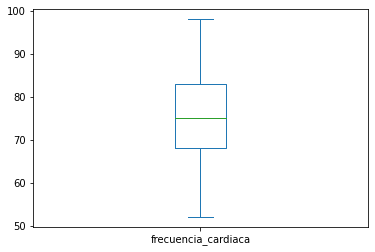

In [ ]:
d.frecuencia_cardiaca.plot(kind="box")

##### variable imc

In [ ]:
########## 
# paso 1 #
##########

# Creamos una funcion para poder visualizar los percentiles
def Cuantiles(lista):
    c = [0,1,5,10,20,30,40,50,60,70,80,90,92.5,95,97.5,99,100]
    matrix = pd.concat([pd.DataFrame(c),pd.DataFrame(np.percentile(lista.dropna(),c))],axis = 1)
    matrix.columns = ["Cuantil","Valor_Cuantil"]
    return(matrix)

########## 
# paso 2 #
##########

# Analizamos las variables numericas
# Variable
Cuantiles(d["imc"]).transpose()

########## 
# paso 3 #
##########

cuantil_1=np.percentile(d["imc"],1)
cuantil_1

cuantil_95= np.percentile(d["imc"],95)
cuantil_95

## ApplicantIncome
cuantil_1 = np.percentile(d["imc"],1)
cuantil_95 = np.percentile(d["imc"],95)
print(cuantil_1)
print(cuantil_95)

########## 
# paso 4 #
##########
# Reemplazamos el valor minimo y maximo
d.loc[d["imc"]<cuantil_1,"imc"] = cuantil_1
d.loc[d["imc"]>cuantil_95,"imc"] = cuantil_95#toda variable asimetrica se presta para sacarle logaritmo asi se vuelve mas interesante
##########
# paso 5 #
##########

Cuantiles(d["imc"]).transpose()

18.1674
32.771499999999996


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
Cuantil,0.0000,1.000000,5.00,10.0,20.00,30.00,40.00,50.0,60.00,70.000,80.00,90.000,92.50000,95.000000,97.5000,99.0000,100.0000
Valor_Cuantil,18.1674,18.172062,20.06,21.1,22.53,23.58,24.49,25.4,26.33,27.399,28.68,30.763,31.62225,32.770225,32.7715,32.7715,32.7715


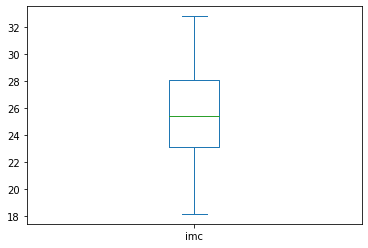

In [ ]:
d.imc.plot(kind="box")

##### variable presion_arterial_diastolica

In [ ]:
########## 
# paso 1 #
##########

# Creamos una funcion para poder visualizar los percentiles
def Cuantiles(lista):
    c = [0,1,5,10,20,30,40,50,60,70,80,90,92.5,95,97.5,99,100]
    matrix = pd.concat([pd.DataFrame(c),pd.DataFrame(np.percentile(lista.dropna(),c))],axis = 1)
    matrix.columns = ["Cuantil","Valor_Cuantil"]
    return(matrix)

########## 
# paso 2 #
##########

# Analizamos las variables numericas
# Variable
Cuantiles(d["presion_arterial_diastolica"]).transpose()

########## 
# paso 3 #
##########

cuantil_1=np.percentile(d["presion_arterial_diastolica"],1)
cuantil_1

cuantil_95= np.percentile(d["presion_arterial_diastolica"],95)
cuantil_95

## ApplicantIncome
cuantil_1 = np.percentile(d["presion_arterial_diastolica"],1)
cuantil_95 = np.percentile(d["presion_arterial_diastolica"],95)
print(cuantil_1)
print(cuantil_95)

########## 
# paso 4 #
##########
# Reemplazamos el valor minimo y maximo
d.loc[d["presion_arterial_diastolica"]<cuantil_1,"presion_arterial_diastolica"] = cuantil_1
d.loc[d["presion_arterial_diastolica"]>cuantil_95,"presion_arterial_diastolica"] = cuantil_95#toda variable asimetrica se presta para sacarle logaritmo asi se vuelve mas interesante
##########
# paso 5 #
##########

Cuantiles(d["presion_arterial_diastolica"]).transpose()

60.0
104.57499999999982


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
Cuantil,0.0,1.0,5.0,10.0,20.0,30.0,40.0,50.0,60.0,70.0,80.0,90.0,92.5,95.00000,97.500,99.000,100.000
Valor_Cuantil,60.0,60.0,66.0,69.0,73.0,76.0,80.0,82.0,85.0,87.5,92.0,98.0,100.5,104.51125,104.575,104.575,104.575


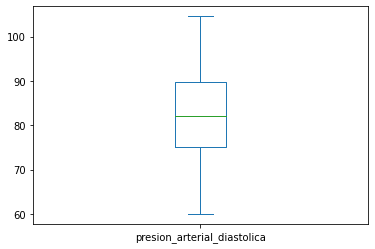

In [ ]:
d.presion_arterial_diastolica.plot(kind="box")

##### variable presion_arterial_sistolica

In [ ]:
########## 
# paso 1 #
##########

# Creamos una funcion para poder visualizar los percentiles
def Cuantiles(lista):
    c = [0,1,5,10,20,30,40,50,60,70,80,90,92.5,95,97.5,99,100]
    matrix = pd.concat([pd.DataFrame(c),pd.DataFrame(np.percentile(lista.dropna(),c))],axis = 1)
    matrix.columns = ["Cuantil","Valor_Cuantil"]
    return(matrix)

########## 
# paso 2 #
##########

# Analizamos las variables numericas
# Variable
Cuantiles(d["presion_arterial_sistolica"]).transpose()

########## 
# paso 3 #
##########

cuantil_1=np.percentile(d["presion_arterial_sistolica"],1)
cuantil_1

cuantil_95= np.percentile(d["presion_arterial_sistolica"],95)
cuantil_95

## ApplicantIncome
cuantil_1 = np.percentile(d["presion_arterial_sistolica"],1)
cuantil_95 = np.percentile(d["presion_arterial_sistolica"],95)
print(cuantil_1)
print(cuantil_95)

########## 
# paso 4 #
##########
# Reemplazamos el valor minimo y maximo
d.loc[d["presion_arterial_sistolica"]<cuantil_1,"presion_arterial_sistolica"] = cuantil_1
d.loc[d["presion_arterial_sistolica"]>cuantil_95,"presion_arterial_sistolica"] = cuantil_95#toda variable asimetrica se presta para sacarle logaritmo asi se vuelve mas interesante
##########
# paso 5 #
##########

Cuantiles(d["presion_arterial_sistolica"]).transpose()

97.0
175.0


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
Cuantil,0.0,1.0,5.0,10.00,20.0,30.0,40.0,50.0,60.0,70.0,80.0,90.0,92.5,95.0,97.5,99.0,100.0
Valor_Cuantil,97.0,97.0,104.0,108.85,114.0,119.5,124.0,128.0,133.0,140.0,148.0,162.0,167.5,175.0,175.0,175.0,175.0


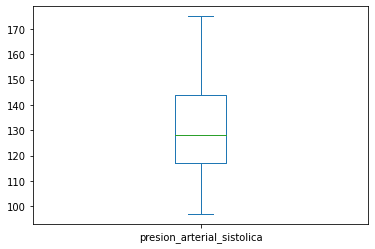

In [ ]:
d.presion_arterial_sistolica.plot(kind="box")

##### variable nivel_de_colesterol

In [ ]:
########## 
# paso 1 #
##########

# Creamos una funcion para poder visualizar los percentiles
def Cuantiles(lista):
    c = [0,1,5,10,20,30,40,50,60,70,80,90,92.5,95,97.5,99,100]
    matrix = pd.concat([pd.DataFrame(c),pd.DataFrame(np.percentile(lista.dropna(),c))],axis = 1)
    matrix.columns = ["Cuantil","Valor_Cuantil"]
    return(matrix)

########## 
# paso 2 #
##########

# Analizamos las variables numericas
# Variable
Cuantiles(d["nivel_de_colesterol"]).transpose()

########## 
# paso 3 #
##########

cuantil_1=np.percentile(d["nivel_de_colesterol"],1)
cuantil_1

cuantil_95= np.percentile(d["nivel_de_colesterol"],95)
cuantil_95

## ApplicantIncome
cuantil_1 = np.percentile(d["nivel_de_colesterol"],1)
cuantil_95 = np.percentile(d["nivel_de_colesterol"],95)
print(cuantil_1)
print(cuantil_95)

########## 
# paso 4 #
##########
# Reemplazamos el valor minimo y maximo
d.loc[d["nivel_de_colesterol"]<cuantil_1,"nivel_de_colesterol"] = cuantil_1
d.loc[d["nivel_de_colesterol"]>cuantil_95,"nivel_de_colesterol"] = cuantil_95#toda variable asimetrica se presta para sacarle logaritmo asi se vuelve mas interesante
##########
# paso 5 #
##########

Cuantiles(d["nivel_de_colesterol"]).transpose()

153.37
312.0


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
Cuantil,0.00,1.0000,5.0,10.0,20.0,30.0,40.0,50.0,60.0,70.0,80.0,90.0,92.500,95.0,97.5,99.0,100.0
Valor_Cuantil,153.37,153.6031,170.0,184.0,200.0,212.0,224.0,234.0,243.0,256.0,271.0,292.0,301.225,312.0,312.0,312.0,312.0


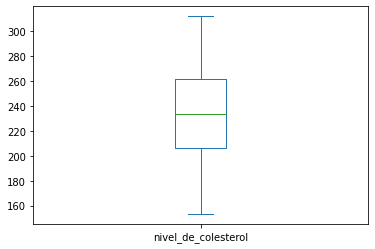

In [ ]:
d.nivel_de_colesterol.plot(kind="box")

##### variable dummy

In [ ]:
d.nunique()

sexo                              2
edad                             39
educacion                         4
fumador                           2
cigarros_por_dia                 33
toma_medicamentos                 2
ictus_prevalente                  2
prevalentHyp                      2
diabetes                          2
nivel_de_colesterol             160
presion_arterial_sistolica      155
presion_arterial_diastolica      91
imc                            1145
frecuencia_cardiaca              47
glucosa                          52
target                            2
dtype: int64

In [ ]:
d[lista_categoricas].columns

Index(['sexo', 'fumador'], dtype='object')

In [ ]:
for col in d[lista_categoricas]:
    # Borrar la columna de tipo object
    Col4Dummy = d.pop(col)
    # Agregar las dummies a mi dataframe
    d = pd.concat([d, pd.get_dummies(Col4Dummy, prefix = col)], axis = 1)

In [ ]:
d

,edad,educacion,cigarros_por_dia,toma_medicamentos,ictus_prevalente,prevalentHyp,diabetes,nivel_de_colesterol,presion_arterial_sistolica,presion_arterial_diastolica,imc,frecuencia_cardiaca,glucosa,target,sexo_hombre,sexo_mujer,fumador_no,fumador_si
0,39,4.0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0,0,1,1,0
1,46,2.0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0,1,0,1,0
2,48,1.0,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0,0,1,0,1
3,61,3.0,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1,1,0,0,1
4,46,3.0,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4233,50,1.0,1.0,0.0,0,1,0,312.0,175.0,92.0,25.97,66.0,86.0,1,0,1,0,1
4234,51,3.0,43.0,0.0,0,0,0,207.0,126.5,80.0,19.71,65.0,68.0,0,0,1,0,1
4235,48,2.0,20.0,0.0,0,0,0,248.0,131.0,72.0,22.00,84.0,86.0,0,1,0,0,1
4236,44,1.0,15.0,0.0,0,0,0,210.0,126.5,87.0,19.16,86.0,78.0,0,1,0,0,1


#### 6 Seleccion de Variables 

##### Seleccion boruta

In [ ]:
pip install boruta

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 56 kB 3.5 MB/s 


In [ ]:
##~~~~~~~~~~~~~~~~~~##
## seleccion boruta ##
##~~~~~~~~~~~~~~~~~~##
# Seleccion Boruta (Permutaciones de arboles)
from sklearn.ensemble import RandomForestClassifier
from boruta import BorutaPy

rfc = RandomForestClassifier(random_state=100)
boruta_selector = BorutaPy(rfc, n_estimators=100,perc = 50,alpha = 0.05,verbose=2,random_state=100)

x=d.drop('target',axis=1).values
y=d.target.values

boruta_selector.fit(x,y)

print("==============BORUTA==============")
print (boruta_selector.n_features_)

Iteration: 	1 / 100
Confirmed: 	0
Tentative: 	17
Rejected: 	0
Iteration: 	2 / 100
Confirmed: 	0
Tentative: 	17
Rejected: 	0
Iteration: 	3 / 100
Confirmed: 	0
Tentative: 	17
Rejected: 	0
Iteration: 	4 / 100
Confirmed: 	0
Tentative: 	17
Rejected: 	0
Iteration: 	5 / 100
Confirmed: 	0
Tentative: 	17
Rejected: 	0
Iteration: 	6 / 100
Confirmed: 	0
Tentative: 	17
Rejected: 	0
Iteration: 	7 / 100
Confirmed: 	0
Tentative: 	17
Rejected: 	0
Iteration: 	8 / 100
Confirmed: 	8
Tentative: 	1
Rejected: 	8
Iteration: 	9 / 100
Confirmed: 	8
Tentative: 	1
Rejected: 	8
Iteration: 	10 / 100
Confirmed: 	8
Tentative: 	1
Rejected: 	8
Iteration: 	11 / 100
Confirmed: 	8
Tentative: 	1
Rejected: 	8
Iteration: 	12 / 100
Confirmed: 	8
Tentative: 	1
Rejected: 	8
Iteration: 	13 / 100
Confirmed: 	8
Tentative: 	1
Rejected: 	8
Iteration: 	14 / 100
Confirmed: 	8
Tentative: 	1
Rejected: 	8
Iteration: 	15 / 100
Confirmed: 	8
Tentative: 	1
Rejected: 	8
Iteration: 	16 / 100
Confirmed: 	8
Tentative: 	1
Rejected: 	8
Iteration:

In [ ]:
########### 
# tablita #
########### 
#
# se esocoge la quinta parte por perspicaz.
TablaImportancia = pd.concat([pd.DataFrame({'Driver':list(d.columns)}),
                              pd.DataFrame({'Importancia':list(boruta_selector.support_)})], axis = 1)
ImportanciaVariables = TablaImportancia[['Driver','Importancia']].sort_values('Importancia', ascending = False).reset_index(drop = True)
ImportanciaVariables

,Driver,Importancia
0,edad,True
1,nivel_de_colesterol,True
2,glucosa,True
3,frecuencia_cardiaca,True
4,imc,True
5,presion_arterial_diastolica,True
6,presion_arterial_sistolica,True
7,cigarros_por_dia,True
8,diabetes,False
9,educacion,False


In [ ]:
len(d.columns)

18

In [ ]:
list((ImportanciaVariables.Driver[0:8]))

['edad',
 'nivel_de_colesterol',
 'glucosa',
 'frecuencia_cardiaca',
 'imc',
 'presion_arterial_diastolica',
 'presion_arterial_sistolica',
 'cigarros_por_dia']

In [ ]:
lista_boruta=list((ImportanciaVariables.Driver[0:9]))

##### Seleccion statsmodels

In [ ]:
from statsmodels.tools import add_constant as add_constant
heart_df_constant = add_constant(d)
heart_df_constant.head()

,const,edad,educacion,cigarros_por_dia,toma_medicamentos,ictus_prevalente,prevalentHyp,diabetes,nivel_de_colesterol,presion_arterial_sistolica,presion_arterial_diastolica,imc,frecuencia_cardiaca,glucosa,target,sexo_hombre,sexo_mujer,fumador_no,fumador_si
0,1.0,39,4.0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0,0,1,1,0
1,1.0,46,2.0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0,1,0,1,0
2,1.0,48,1.0,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0,0,1,0,1
3,1.0,61,3.0,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1,1,0,0,1
4,1.0,46,3.0,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0,1,0,0,1


In [ ]:
heart_df_constant.columns

Index(['const', 'edad', 'educacion', 'cigarros_por_dia', 'toma_medicamentos',
       'ictus_prevalente', 'prevalentHyp', 'diabetes', 'nivel_de_colesterol',
       'presion_arterial_sistolica', 'presion_arterial_diastolica', 'imc',
       'frecuencia_cardiaca', 'glucosa', 'target', 'sexo_hombre', 'sexo_mujer',
       'fumador_no', 'fumador_si'],
      dtype='object')

In [ ]:
heart_df_constant=heart_df_constant[['const', 'edad', 'educacion', 'cigarros_por_dia', 'toma_medicamentos',
       'ictus_prevalente', 'prevalentHyp', 'diabetes', 'nivel_de_colesterol',
       'presion_arterial_sistolica', 'presion_arterial_diastolica', 'imc',
       'frecuencia_cardiaca', 'glucosa', 'sexo_hombre', 'sexo_mujer',
       'fumador_no', 'fumador_si','target']]

In [ ]:
heart_df_constant.head(2)

,const,edad,educacion,cigarros_por_dia,toma_medicamentos,ictus_prevalente,prevalentHyp,diabetes,nivel_de_colesterol,presion_arterial_sistolica,presion_arterial_diastolica,imc,frecuencia_cardiaca,glucosa,sexo_hombre,sexo_mujer,fumador_no,fumador_si,target
0,1.0,39,4.0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0,1,1,0,0
1,1.0,46,2.0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,1,0,1,0,0


In [ ]:
heart_df_constant.columns[:-1]

Index(['const', 'edad', 'educacion', 'cigarros_por_dia', 'toma_medicamentos',
       'ictus_prevalente', 'prevalentHyp', 'diabetes', 'nivel_de_colesterol',
       'presion_arterial_sistolica', 'presion_arterial_diastolica', 'imc',
       'frecuencia_cardiaca', 'glucosa', 'sexo_hombre', 'sexo_mujer',
       'fumador_no', 'fumador_si'],
      dtype='object')

In [ ]:
import statsmodels.api as sm
import scipy.stats as st
st.chisqprob = lambda chisq, df: st.chi2.sf(chisq, d)
cols=heart_df_constant.columns[:-1]
model=sm.Logit(d.target,heart_df_constant[cols])
result=model.fit()
result.summary()

Optimization terminated successfully.
         Current function value: 0.380320
         Iterations 12


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                 target   No. Observations:                 4238
Model:                          Logit   Df Residuals:                     4221
Method:                           MLE   Df Model:                           16
Date:                Tue, 13 Dec 2022   Pseudo R-squ.:                  0.1074
Time:                        04:44:26   Log-Likelihood:                -1611.8
converged:                       True   LL-Null:                       -1805.8
Covariance Type:            nonrobust   LLR p-value:                 1.211e-72
===============================================================================================
                                  coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const                          -3.9117      4e+06  -9.77e-07      1.000   -7.84e+06    7.84e+06
edad                            0.0622      0.006      9.992      0.000       0.050       0.074
educacion                      -0.0142      0.046     -0.309      0.757      -0.105       0.076
cigarros_por_dia                0.0213      0.006      3.766      0.000       0.010       0.032
toma_medicamentos               0.2939      0.217      1.357      0.175      -0.130       0.718
ictus_prevalente                0.9545      0.441      2.165      0.030       0.090       1.819
prevalentHyp                    0.2266      0.135      1.681      0.093      -0.038       0.491
diabetes                        0.7202      0.230      3.130      0.002       0.269       1.171
nivel_de_colesterol             0.0019      0.001      1.618      0.106      -0.000       0.004
presion_arterial_sistolica      0.0165      0.004      3.929      0.000       0.008       0.025
presion_arterial_diastolica    -0.0051      0.007     -0.759      0.448      -0.018       0.008
imc                             0.0020      0.014      0.141      0.888      -0.025       0.029
frecuencia_cardiaca            -0.0006      0.004     -0.141      0.887      -0.009       0.008
glucosa                         0.0041      0.004      1.050      0.294      -0.004       0.012
sexo_hombre                    -2.2063        nan        nan        nan         nan         nan
sexo_mujer                     -1.7054        nan        nan        nan         nan         nan
fumador_no                     -1.9588   1.29e+06  -1.51e-06      1.000   -2.54e+06    2.54e+06
fumador_si                     -1.9529   1.29e+06  -1.51e-06      1.000   -2.54e+06    2.54e+06
===============================================================================================
"""

In [ ]:
def back_feature_elem (data_frame,dep_var,col_list):
    

    while len(col_list)>0 :
        model=sm.Logit(dep_var,data_frame[col_list])
        result=model.fit(disp=0)
        largest_pvalue=round(result.pvalues,3).nlargest(1)
        if largest_pvalue[0]<(0.05):
            return result
            break
        else:
            col_list=col_list.drop(largest_pvalue.index)

result=back_feature_elem(heart_df_constant,heart_df_constant.target,cols)
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                 target   No. Observations:                 4238
Model:                          Logit   Df Residuals:                     4230
Method:                           MLE   Df Model:                            7
Date:                Tue, 13 Dec 2022   Pseudo R-squ.:                  0.1049
Time:                        04:44:36   Log-Likelihood:                -1616.4
converged:                       True   LL-Null:                       -1805.8
Covariance Type:            nonrobust   LLR p-value:                 8.800e-78
==============================================================================================
                                 coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------
edad                           0.0653      0.006     10.991      0.000       0.054       0.077
cigarros_por_dia               0.0214      0.006      3.807      0.000       0.010       0.032
ictus_prevalente               1.0409      0.437      2.382      0.017       0.184       1.898
diabetes                       0.8229      0.215      3.826      0.000       0.401       1.244
presion_arterial_sistolica     0.0195      0.002      8.302      0.000       0.015       0.024
sexo_mujer                     0.4707      0.097      4.867      0.000       0.281       0.660
fumador_no                    -8.1862      0.403    -20.337      0.000      -8.975      -7.397
fumador_si                    -8.1880      0.403    -20.293      0.000      -8.979      -7.397
==============================================================================================
"""

In [ ]:
lista_statsmodels=['edad','cigarros_por_dia','ictus_prevalente','diabetes','presion_arterial_sistolica','sexo_mujer','fumador_no','fumador_si','target']
len(lista_statsmodels)

9

##### Seleccion fea

In [ ]:
# !pip install featurewiz

In [ ]:
target = 'target' 
features, train = featurewiz(d, target, corr_limit=0.7, verbose=2, sep=",",
header=0,test_data="", feature_engg="", category_encoders="",random_state=100)

In [ ]:
lista_featurewiz=(features)

In [ ]:
lista_featurewiz

[]

In [ ]:
lista_featurewiz.append('target')

#### 7 Particion 

In [ ]:
lista_boruta.append('target')
 

In [ ]:
lista_boruta

['edad',
 'nivel_de_colesterol',
 'glucosa',
 'frecuencia_cardiaca',
 'imc',
 'presion_arterial_diastolica',
 'presion_arterial_sistolica',
 'cigarros_por_dia',
 'diabetes',
 'target']

In [ ]:
lista_featurewiz

[]

In [ ]:
lista_statsmodels

['edad',
 'cigarros_por_dia',
 'ictus_prevalente',
 'diabetes',
 'presion_arterial_sistolica',
 'sexo_mujer',
 'fumador_no',
 'fumador_si',
 'target']

In [ ]:
d1=d[lista_statsmodels]

In [ ]:
x=d1.drop('target',axis=1)
y=d1.target

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x,
                                                    y,
                                                    test_size=0.25,
                                                    stratify=y,
                                                    random_state=1)

In [ ]:
y_train.value_counts()/len(y_train)

0    0.848018
1    0.151982
Name: target, dtype: float64

In [ ]:
print(y_train.value_counts()/len(y_train))
print(y_test.value_counts()/len(y_test))
print(y.value_counts()/len(y))
print(y.value_counts())
print(1000/4238)

0    0.848018
1    0.151982
Name: target, dtype: float64
0    0.848113
1    0.151887
Name: target, dtype: float64
0    0.848042
1    0.151958
Name: target, dtype: float64
0    3594
1     644
Name: target, dtype: int64
0.23596035865974516


#### 8 Balanceo 

In [ ]:
from imblearn.under_sampling import RandomUnderSampler  

under_sampler = RandomUnderSampler(random_state=2022)
X_res, y_res = under_sampler.fit_resample(x_train, y_train)
print('random_undersamplig')

print(y_res.value_counts())
print('-------------------------')


from imblearn.over_sampling import RandomOverSampler
over_sampler = RandomOverSampler(random_state=2022)
X_res1, y_res1 = over_sampler.fit_resample(x_train, y_train)

print('random_oversamplig')

print(y_res1.value_counts())
print('-------------------------')

import random
random.seed(0)
from imblearn.combine import SMOTETomek
os_us = SMOTETomek(random_state=2022)
X_res2, y_res2 = os_us.fit_resample(x_train, y_train)

print('SMOTETomek')

print(y_res2.value_counts())


random_undersamplig
0    483
1    483
Name: target, dtype: int64
-------------------------
random_oversamplig
0    2695
1    2695
Name: target, dtype: int64
-------------------------
SMOTETomek
0    2541
1    2541
Name: target, dtype: int64


-RandomOversamplig  
*  X_res1, y_res1

-SMOTETomek         
* X_res2, y_res2

-RandomUnderSampler : 
* X_res, y_res

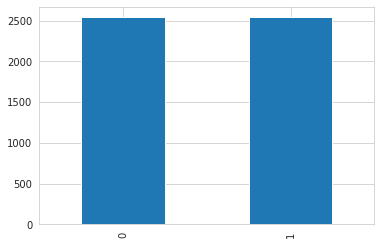

In [ ]:
 y_res2.value_counts().plot.bar()

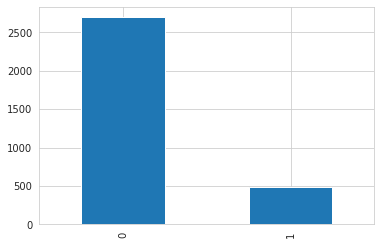

In [ ]:
y_train.value_counts().plot.bar()

#### Modelos de Machine Learning
- Logistic Regression
- Naive Bayes
- Random Forest Classifier
- Extreme Gradient Boost
- K-Nearest Neighbour
- Decision Tree
- Support Vector Machine

#### 9 Modelos

In [ ]:
Counter(y_train)

Counter({0: 2695, 1: 483})

In [ ]:
Counter(y_res2)

Counter({0: 2672, 1: 2672})

In [ ]:
#help(LogisticRegression)

In [ ]:
m1 = 'Logistic Regression'
lr = LogisticRegression(max_iter = 1000,solver='liblinear',random_state=0)
lr.fit(X_res2, y_res2)
lr_predict = lr.predict(x_test)
lr_conf_matrix = confusion_matrix(y_test, lr_predict)
lr_acc_score = accuracy_score(y_test, lr_predict)
print("confussion matrix")
print(lr_conf_matrix)
print("\n")
print("Accuracy of Logistic Regression:",lr_acc_score*100,'\n')
print(classification_report(y_test,lr_predict))

confussion matrix
[[580 319]
 [ 60 101]]


Accuracy of Logistic Regression: 64.24528301886792 

              precision    recall  f1-score   support

           0       0.91      0.65      0.75       899
           1       0.24      0.63      0.35       161

    accuracy                           0.64      1060
   macro avg       0.57      0.64      0.55      1060
weighted avg       0.81      0.64      0.69      1060



In [ ]:
m1 = 'DecisionTreeClassifier'
arbol = DecisionTreeClassifier(max_depth=4,criterion='gini',splitter='best',random_state=0)
arbol.fit(X_res2, y_res2)
arbol_predict = arbol.predict(x_test)
arbol_conf_matrix = confusion_matrix(y_test, arbol_predict)
arbol_acc_score = accuracy_score(y_test, arbol_predict)
print("confussion matrix")
print(arbol_conf_matrix)
print("\n")
print("Accuracy of DecisionTreeClassifier:",arbol_acc_score*100,'\n')
print(classification_report(y_test,arbol_predict))

confussion matrix
[[448 451]
 [ 34 127]]


Accuracy of DecisionTreeClassifier: 54.24528301886793 

              precision    recall  f1-score   support

           0       0.93      0.50      0.65       899
           1       0.22      0.79      0.34       161

    accuracy                           0.54      1060
   macro avg       0.57      0.64      0.50      1060
weighted avg       0.82      0.54      0.60      1060



In [ ]:
m1 = 'RandomForestClassifier'
rdn = RandomForestClassifier(max_features='auto',criterion='gini',n_estimators=100,max_depth=3,random_state=0)
rdn.fit(X_res2, y_res2)
rdn_predict = rdn.predict(x_test)
rdn_conf_matrix = confusion_matrix(y_test, rdn_predict)
rdn_acc_score = accuracy_score(y_test, rdn_predict)
print("confussion matrix")
print(rdn_conf_matrix)
print("\n")
print("Accuracy of RandomForestClassifier:",rdn_acc_score*100,'\n')
print(classification_report(y_test,rdn_predict))

confussion matrix
[[508 391]
 [ 51 110]]


Accuracy of RandomForestClassifier: 58.30188679245283 

              precision    recall  f1-score   support

           0       0.91      0.57      0.70       899
           1       0.22      0.68      0.33       161

    accuracy                           0.58      1060
   macro avg       0.56      0.62      0.51      1060
weighted avg       0.80      0.58      0.64      1060



In [ ]:
m1 = 'XGBClassifier'
#max_features='sqrt',criterion='gini',n_estimators=120,max_depth=6,min_samples_split=0.1,min_sample_leaf=0.2,max_leaf_nodes=10
xgb = XGBClassifier(random_state=0)
xgb.fit(X_res2, y_res2)
xgb_predict = xgb.predict(x_test)
xgb_conf_matrix = confusion_matrix(y_test, xgb_predict)
xgb_acc_score = accuracy_score(y_test, xgb_predict)
print("confussion matrix")
print(xgb_conf_matrix)
print("\n")
print("Accuracy of XGBClassifier:",xgb_acc_score*100,'\n')
print(classification_report(y_test,xgb_predict))

confussion matrix
[[745 154]
 [100  61]]


Accuracy of XGBClassifier: 76.0377358490566 

              precision    recall  f1-score   support

           0       0.88      0.83      0.85       899
           1       0.28      0.38      0.32       161

    accuracy                           0.76      1060
   macro avg       0.58      0.60      0.59      1060
weighted avg       0.79      0.76      0.77      1060



In [ ]:
m1 = 'KNeighborsClassifier'
kn = KNeighborsClassifier()
kn.fit(X_res2, y_res2)
kn_predict = xgb.predict(x_test)
kn_conf_matrix = confusion_matrix(y_test, kn_predict)
kn_acc_score = accuracy_score(y_test, kn_predict)
print("confussion matrix")
print(kn_conf_matrix)
print("\n")
print("Accuracy of KNeighborsClassifier:",kn_acc_score*100,'\n')
print(classification_report(y_test,kn_predict))

confussion matrix
[[745 154]
 [100  61]]


Accuracy of KNeighborsClassifier: 76.0377358490566 

              precision    recall  f1-score   support

           0       0.88      0.83      0.85       899
           1       0.28      0.38      0.32       161

    accuracy                           0.76      1060
   macro avg       0.58      0.60      0.59      1060
weighted avg       0.79      0.76      0.77      1060



In [ ]:
m1 = 'SVC'
svc = SVC(random_state=0)
svc.fit(X_res2, y_res2)
svc_predict = xgb.predict(x_test)
svc_conf_matrix = confusion_matrix(y_test, svc_predict)
svc_acc_score = accuracy_score(y_test, svc_predict)
print("confussion matrix")
print(svc_conf_matrix)
print("\n")
print("Accuracy of SVC:",svc_acc_score*100,'\n')
print(classification_report(y_test,svc_predict))

confussion matrix
[[745 154]
 [100  61]]


Accuracy of SVC: 76.0377358490566 

              precision    recall  f1-score   support

           0       0.88      0.83      0.85       899
           1       0.28      0.38      0.32       161

    accuracy                           0.76      1060
   macro avg       0.58      0.60      0.59      1060
weighted avg       0.79      0.76      0.77      1060



In [ ]:
#--------------------#
# lista seleccionada #
#--------------------#
print(len(lista_featurewiz))
lista_featurewiz[0:13] # sin la target


0


[]

In [ ]:
print(len(d1.columns))
d1.columns

10


Index(['edad', 'nivel_de_colesterol', 'glucosa', 'frecuencia_cardiaca', 'imc',
       'presion_arterial_diastolica', 'presion_arterial_sistolica',
       'cigarros_por_dia', 'diabetes', 'target'],
      dtype='object')

In [ ]:
rdn.feature_importances_

array([0.36124752, 0.04708609, 0.03888698, 0.03400261, 0.04737783,
       0.09110557, 0.28654543, 0.09374796, 0.        ])

In [ ]:
# Seleccion por Random Forest
#
# se esocoge la quinta parte por perspicaz.
TablaImportancia = pd.concat([pd.DataFrame({'Driver':(lista_boruta[0:9])}),
                              pd.DataFrame({'Importancia':list(rdn.feature_importances_)})], axis = 1)
ImportanciaVariables = TablaImportancia[['Driver','Importancia']].sort_values('Importancia', ascending = False).reset_index(drop = True)
ImportanciaVariables

,Driver,Importancia
0,edad,0.361248
1,presion_arterial_sistolica,0.286545
2,cigarros_por_dia,0.093748
3,presion_arterial_diastolica,0.091106
4,imc,0.047378
5,nivel_de_colesterol,0.047086
6,glucosa,0.038887
7,frecuencia_cardiaca,0.034003
8,diabetes,0.000000


In [ ]:
# Seleccion por Random Forest
#
# se esocoge la quinta parte por perspicaz.
TablaImportancia = pd.concat([pd.DataFrame({'Driver':(lista_statsmodels)}),
                              pd.DataFrame({'Importancia':list(rdn.feature_importances_)})], axis = 1)
ImportanciaVariables = TablaImportancia[['Driver','Importancia']].sort_values('Importancia', ascending = False).reset_index(drop = True)
ImportanciaVariables

,Driver,Importancia
0,edad,0.422569
1,presion_arterial_sistolica,0.337961
2,cigarros_por_dia,0.141184
3,fumador_no,0.040716
4,fumador_si,0.039306
5,sexo_mujer,0.013282
6,diabetes,0.003822
7,ictus_prevalente,0.001160
8,target,NaN


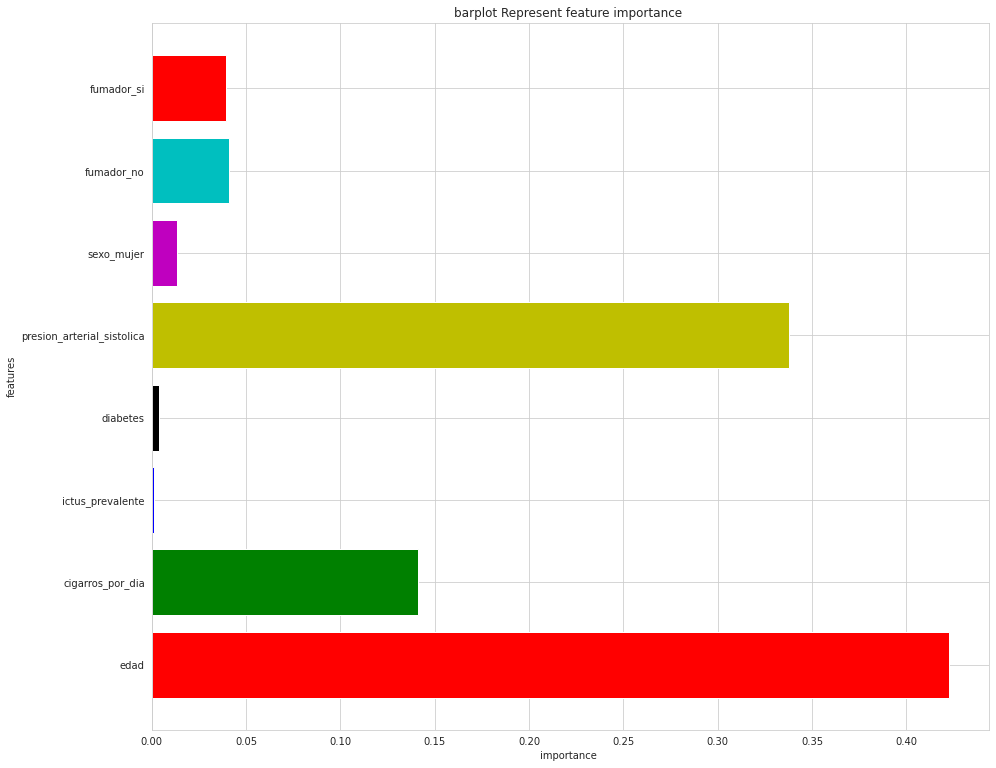

In [ ]:
imp_feature = pd.DataFrame({'Feature':(lista_statsmodels[0:8]), 'Importance': rdn.feature_importances_})
plt.figure(figsize=(15,13))
plt.title("barplot Represent feature importance ")
plt.xlabel("importance ")
plt.ylabel("features")
plt.barh(imp_feature['Feature'],imp_feature['Importance'],color = 'rgbkymc')
plt.show()

In [ ]:
len(lista_boruta)

10

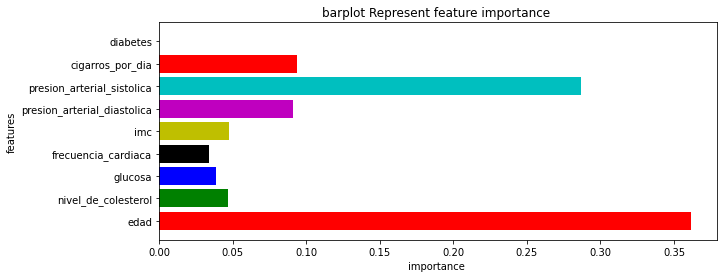

In [ ]:
imp_feature = pd.DataFrame({'Feature':(lista_boruta[0:9]), 'Importance': rdn.feature_importances_})
plt.figure(figsize=(10,4))
plt.title("barplot Represent feature importance ")
plt.xlabel("importance ")
plt.ylabel("features")
plt.barh(imp_feature['Feature'],imp_feature['Importance'],color = 'rgbkymc')
plt.show()

#### 10 Stacking

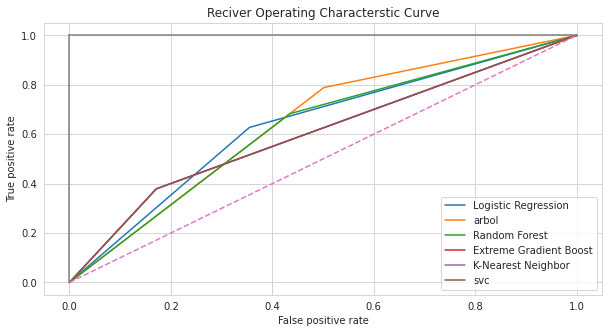

In [ ]:
lr_false_positive_rate,lr_true_positive_rate,lr_threshold = roc_curve(y_test,lr_predict)
arbol_false_positive_rate,arbol_true_positive_rate,arbol_threshold = roc_curve(y_test,arbol_predict)
rdn_false_positive_rate,rdn_true_positive_rate,rdn_threshold = roc_curve(y_test,rdn_predict)                                                             
xgb_false_positive_rate,xgb_true_positive_rate,xgb_threshold = roc_curve(y_test,xgb_predict)
knn_false_positive_rate,knn_true_positive_rate,knn_threshold = roc_curve(y_test,kn_predict)
svc_false_positive_rate,svc_true_positive_rate,svc_threshold = roc_curve(y_test,svc_predict)

 
 

sns.set_style('whitegrid')
plt.figure(figsize=(10,5))
plt.title('Reciver Operating Characterstic Curve')
plt.plot(lr_false_positive_rate,lr_true_positive_rate,label='Logistic Regression')
plt.plot(arbol_false_positive_rate,arbol_true_positive_rate,label='arbol')
plt.plot(rdn_false_positive_rate,rdn_true_positive_rate,label='Random Forest')
plt.plot(xgb_false_positive_rate,xgb_true_positive_rate,label='Extreme Gradient Boost')
plt.plot(knn_false_positive_rate,knn_true_positive_rate,label='K-Nearest Neighbor')
plt.plot(svc_false_positive_rate,svc_true_positive_rate,label='svc')

 
plt.plot([0,1],ls='--')
plt.plot([0,0],[1,0],c='.5')
plt.plot([1,1],c='.5')
plt.ylabel('True positive rate')
plt.xlabel('False positive rate')
plt.legend()
plt.show()

In [ ]:
model_ev = pd.DataFrame({'Model': ['Logistic Regression','arbol','Random Forest','Extreme Gradient Boost',
                    'K-Nearest Neighbor','svc'], 'Accuracy': [lr_acc_score*100,
                    arbol_acc_score*100,rdn_acc_score*100,xgb_acc_score*100,kn_acc_score*100,svc_acc_score*100]})
model_ev

,Model,Accuracy
0,Logistic Regression,64.245283
1,arbol,54.245283
2,Random Forest,58.301887
3,Extreme Gradient Boost,76.037736
4,K-Nearest Neighbor,76.037736
5,svc,76.037736


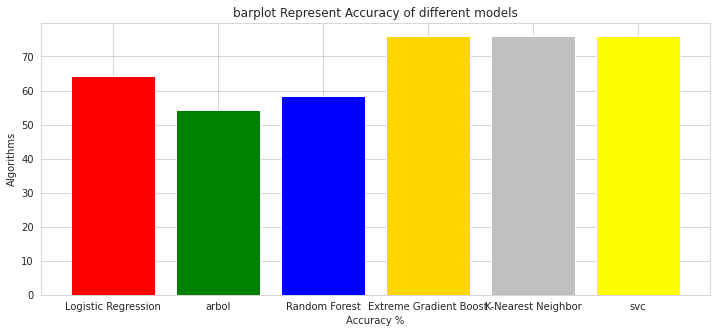

In [ ]:
colors = ['red','green','blue','gold','silver','yellow','orange',]
plt.figure(figsize=(12,5))
plt.title("barplot Represent Accuracy of different models")
plt.xlabel("Accuracy %")
plt.ylabel("Algorithms")
plt.bar(model_ev['Model'],model_ev['Accuracy'],color = colors)
plt.show()

In [ ]:
from mlxtend.classifier import StackingCVClassifier

In [ ]:
# help(StackingCVClassifier)

In [ ]:
scv=StackingCVClassifier(classifiers=[rdn,lr],meta_classifier= rdn)

In [ ]:
scv.fit(X_res2.values, y_res2.values)

StackingCVClassifier(classifiers=[RandomForestClassifier(max_depth=3,
                                                         random_state=0),
                                  LogisticRegression(max_iter=1000,
                                                     random_state=0,
                                                     solver='liblinear')],
                     meta_classifier=RandomForestClassifier(max_depth=3,
                                                            random_state=0))

In [ ]:
#X_res2, y_res2
y_res2.head(2)

0    0
1    0
Name: target, dtype: int64

In [ ]:
scv_predicted = scv.predict(x_test.values)
scv_conf_matrix = confusion_matrix(y_test.values, scv_predicted)
scv_acc_score = accuracy_score(y_test.values, scv_predicted)
print("confussion matrix")
print(scv_conf_matrix)
print("\n")
print("Accuracy of StackingCVClassifier:",scv_acc_score*100,'\n')
print(classification_report(y_test.values,scv_predicted))

confussion matrix
[[479 420]
 [ 44 117]]


Accuracy of StackingCVClassifier: 56.22641509433962 

              precision    recall  f1-score   support

           0       0.92      0.53      0.67       899
           1       0.22      0.73      0.34       161

    accuracy                           0.56      1060
   macro avg       0.57      0.63      0.50      1060
weighted avg       0.81      0.56      0.62      1060



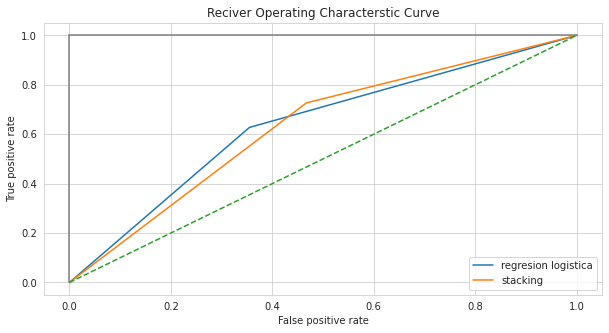

In [ ]:

rdn_false_positive_rate,rdn_true_positive_rate,rdn_threshold = roc_curve(y_test,rdn_predict)                                                             

#
scv_false_positive_rate,scv_true_positive_rate,scv_threshold = roc_curve(y_test,scv_predicted) 
 
 

sns.set_style('whitegrid')
plt.figure(figsize=(10,5))
plt.title('Reciver Operating Characterstic Curve')

plt.plot(lr_false_positive_rate,lr_true_positive_rate,label='regresion logistica')

#
plt.plot(scv_false_positive_rate,scv_true_positive_rate,label='stacking')
 
plt.plot([0,1],ls='--')
plt.plot([0,0],[1,0],c='.5')
plt.plot([1,1],c='.5')
plt.ylabel('True positive rate')
plt.xlabel('False positive rate')
plt.legend()
plt.show()

In [ ]:
###########
# forma 2 #
###########

from sklearn import metrics as metrics
#X_res2, y_res2

#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~#
#            Metricas              #                                
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~#

# Paso N°04: Predecir con el algoritmo entrenado para validar
y_pred_train=scv.predict(X_res2) # Prediccion sobre el train
y_pred_test= scv.predict(x_test) # Prediccion sobre el test


#--------------------------------------------------------------#


# Paso N°05: Comparar el valor pronosticado con el valor real

from sklearn import metrics as metrics
# Matriz de confusion
print("Matriz confusion: Train")
cm_train = metrics.confusion_matrix(y_res2,y_pred_train)
print(cm_train)

print("Matriz confusion: Test")
cm_test = metrics.confusion_matrix(y_test,y_pred_test)
print(cm_test)

# Accuracy
print("Accuracy: Train")
accuracy_train=metrics.accuracy_score(y_res2,y_pred_train)
print(accuracy_train)

print("Accuracy: Test")
accuracy_test=metrics.accuracy_score(y_test,y_pred_test)
print(accuracy_test)

# Precision
print("Precision: Train")
precision_train=metrics.precision_score(y_res2,y_pred_train)
print(precision_train)

print("Precision: Test")
precision_test=metrics.precision_score(y_test,y_pred_test)
print(precision_test)

# Recall
print("Recall: Train")
recall_train=metrics.recall_score(y_res2,y_pred_train)
print(recall_train)

print("Recall: Test")
recall_test=metrics.recall_score(y_test,y_pred_test)
print(recall_test)

Matriz confusion: Train
[[1510 1031]
 [ 544 1997]]
Matriz confusion: Test
[[479 420]
 [ 44 117]]
Accuracy: Train
0.6900826446280992
Accuracy: Test
0.5622641509433962
Precision: Train
0.6595112285336856
Precision: Test
0.21787709497206703
Recall: Train
0.7859110586383313
Recall: Test
0.7267080745341615


#### Data_final 
- **lista_boruta**
-'cigarros_por_dia',
 'presion_arterial_sistolica',
 'presion_arterial_diastolica',
 'imc',
 'frecuencia_cardiaca',
 'glucosa',
 'sexo_1',
 'nivel_de_colesterol',
 'edad_edad_c2

In [ ]:
d[lista_boruta].columns

Index(['cigarros_por_dia', 'presion_arterial_sistolica',
       'presion_arterial_diastolica', 'imc', 'frecuencia_cardiaca', 'glucosa',
       'sexo_1', 'nivel_de_colesterol', 'edad_edad_c2', 'target'],
      dtype='object')

In [ ]:
lista_fin=['cigarros_por_dia', 'presion_arterial_sistolica',
       'presion_arterial_diastolica', 'imc', 'frecuencia_cardiaca', 'glucosa',
       'sexo_1', 'nivel_de_colesterol', 'edad_edad_c2']
x1=d[lista_fin]       

In [ ]:
x1.head(5)

,cigarros_por_dia,presion_arterial_sistolica,presion_arterial_diastolica,imc,frecuencia_cardiaca,glucosa,sexo_1,nivel_de_colesterol,edad_edad_c2
0,0.0,106.0,70.0,26.97,80.0,77.0,1,195.0,0
1,0.0,121.0,81.0,28.73,95.0,76.0,0,250.0,1
2,20.0,127.5,80.0,25.34,75.0,70.0,1,245.0,1
3,30.0,150.0,95.0,28.58,65.0,103.0,0,225.0,0
4,23.0,130.0,84.0,23.10,85.0,85.0,0,285.0,1


In [ ]:
#x.drop('target_predicho',axis=1,inplace=True)
x1['target_predicho']=scv.predict(x1)

In [ ]:
x1['target']=d.target
x1.columns
print(x1.target_predicho.value_counts())
print(x1.target.value_counts())

0    2896
1    1342
Name: target_predicho, dtype: int64
0    3594
1     644
Name: target, dtype: int64


In [ ]:
x1.groupby(['target']).agg({'target_predicho':'count'})

,target_predicho
target,
0,3594
1,644


In [ ]:
import pandas as pd
my_crosstab = pd.crosstab(index=x1["target"], 
                            columns=x1["target_predicho"],
                             margins=False)   # Include row and column totals
my_crosstab

target_predicho,0,1
target,,
0,2591,1003
1,305,339


#### Graficos Finales

In [ ]:
print(len(lista_boruta))
print(lista_boruta)
print(lista_boruta[0:9])

10
['cigarros_por_dia', 'presion_arterial_sistolica', 'presion_arterial_diastolica', 'imc', 'frecuencia_cardiaca', 'glucosa', 'sexo_1', 'nivel_de_colesterol', 'edad_edad_c2', 'target']
['cigarros_por_dia', 'presion_arterial_sistolica', 'presion_arterial_diastolica', 'imc', 'frecuencia_cardiaca', 'glucosa', 'sexo_1', 'nivel_de_colesterol', 'edad_edad_c2']


In [ ]:
(x1[lista_boruta[0:9]]).dtypes

cigarros_por_dia               float64
presion_arterial_sistolica     float64
presion_arterial_diastolica    float64
imc                            float64
frecuencia_cardiaca            float64
glucosa                        float64
sexo_1                           uint8
nivel_de_colesterol            float64
edad_edad_c2                     uint8
dtype: object

##### target y target_predicho

In [ ]:
print("--------------------------")
print('esto dice la data original')
print("--------------------------")
print(x1.target.value_counts())
print("-------------------")
print('esto dice el modelo')
print("-------------------")
print(x1.target_predicho.value_counts())

--------------------------
esto dice la data original
--------------------------
0    3594
1     644
Name: target, dtype: int64
-------------------
esto dice el modelo
-------------------
0    2896
1    1342
Name: target_predicho, dtype: int64


In [ ]:
import pandas as pd
my_crosstab = pd.crosstab(index=x1["target"], 
                            columns=x1["target_predicho"],
                             margins=True)   # Include row and column totals
my_crosstab

target_predicho,0,1,All
target,,,
0,2591,1003,3594
1,305,339,644
All,2896,1342,4238


In [ ]:
x1.groupby(['target','target_predicho']).agg({'target_predicho':'count'})

target_predicho
target target_predicho                 
0      0                           2591
       1                           1003
1      0                            305
       1                            339

In [ ]:
np.array(x1.groupby(['target','target_predicho']).agg({'target_predicho':'count'}))

array([[2591],
       [1003],
       [ 305],
       [ 339]])

**************************
        target            
**************************
--------------------------
        comparacion       
--------------------------


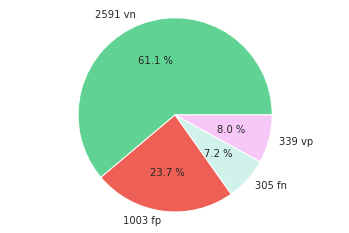

In [ ]:
#--------#
# paso 4 #
#--------#
print("**************************")
print('        target            ')
print("**************************")

print("--------------------------")
print('        comparacion       ')
print("--------------------------")

import matplotlib.pyplot as plt

numero = np.array(x1.groupby(['target','target_predicho']).agg({'target_predicho':'count'})) # c1=categoria 1 de 30 a 45 años,c2= categoria 2 de 45 a 60 años, c3=categoria 3 de 60 a 75. 
nombres = ["2591 vn ","1003 fp","305 fn","339 vp"]
colores = ["#60D394","#EE6055","#D1F2EB","#F7C8F7"]
plt.pie(numero, labels=nombres, autopct="%0.1f %%", colors=colores)
plt.axis("equal")
plt.show()


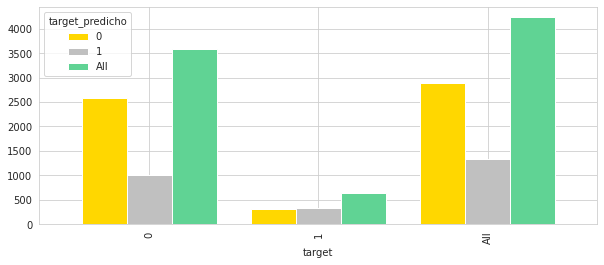

In [ ]:
coloresMedallas = ['#FFD700','#C0C0C0',"#60D394"]

my_crosstab.plot(kind = 'bar',
             width=0.8,
             figsize=(10,4),
             color = coloresMedallas)

##### sexo 

In [ ]:
#--------#
# paso 1 #
#--------#
x1.sexo_1.unique()#femenino


array([1, 0], dtype=uint8)

In [ ]:
#--------#
# paso 2 #
#--------#

print("--------------------------")
print('esto dice la data original')
print("--------------------------")

print(x1.sexo_1.value_counts())

print("-----------")
print('equivalente')
print("-----------")

x1.groupby(['sexo_1']).agg({'target':'count'})
        #cualitativa       #cuantitativa

--------------------------
esto dice la data original
--------------------------
0    2419
1    1819
Name: sexo_1, dtype: int64
-----------
equivalente
-----------


,target
sexo_1,
0,2419
1,1819


In [ ]:
#--------#
# paso 3 #
#--------#
x1.groupby(['target_predicho','sexo_1']).count()

# hombre : 1201 + 618 =1819
# mujer  : 1695 + 724 =2419

cigarros_por_dia  presion_arterial_sistolica  \
target_predicho sexo_1                                                 
0               0                   1695                        1695   
                1                   1201                        1201   
1               0                    724                         724   
                1                    618                         618   

                        presion_arterial_diastolica   imc  \
target_predicho sexo_1                                      
0               0                              1695  1695   
                1                              1201  1201   
1               0                               724   724   
                1                               618   618   

                        frecuencia_cardiaca  glucosa  nivel_de_colesterol  \
target_predicho sexo_1                                                      
0               0                      1695     1695                 1695   
                1                      1201     1201                 1201   
1               0                       724      724                  724   
                1                       618      618                  618   

                        edad_edad_c2  target  
target_predicho sexo_1                        
0               0               1695    1695  
                1               1201    1201  
1               0                724     724  
                1                618     618

In [ ]:
x1.groupby(['target_predicho','sexo_1']).agg({'target_predicho':'count'})

target_predicho
target_predicho sexo_1                 
0               0                  1695
                1                  1201
1               0                   724
                1                   618

In [ ]:
#-------------------#
# covertir en numpy #
#-------------------#
np.array(x1.groupby(['target_predicho','sexo_1']).agg({'target':'count'}))

array([[1695],
       [1201],
       [ 724],
       [ 618]])

**************************
           sexo           
**************************
--------------------------
esto dice la data original
--------------------------


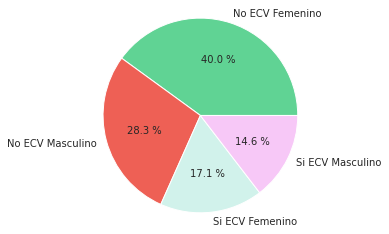

-------------------
esto dice el modelo
-------------------


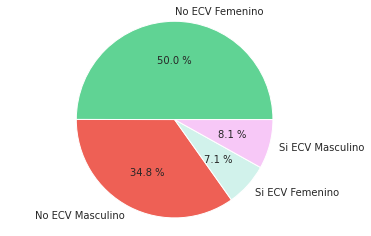

In [ ]:
#--------#
# paso 4 #
#--------#
import matplotlib.pyplot as plt

print("**************************")
print('           sexo           ')
print("**************************")

print("--------------------------")
print('esto dice la data original')
print("--------------------------")

numero = np.array(x1.groupby(['target_predicho','sexo_1']).agg({'target_predicho':'count'})) # 1=masculino
nombres = ["No ECV Femenino","No ECV Masculino","Si ECV Femenino","Si ECV Masculino"]
colores = ["#60D394","#EE6055","#D1F2EB","#F7C8F7"]
plt.pie(numero, labels=nombres, autopct="%0.1f %%", colors=colores)
plt.axis("equal")
plt.show()

print("-------------------")
print('esto dice el modelo')
print("-------------------")

numero = np.array(x1.groupby(['target','sexo_1']).agg({'target':'count'})) # 1=masculino
nombres = ["No ECV Femenino","No ECV Masculino","Si ECV Femenino","Si ECV Masculino"]
colores = ["#60D394","#EE6055","#D1F2EB","#F7C8F7"]
plt.pie(numero, labels=nombres, autopct="%0.1f %%", colors=colores)
plt.axis("equal")
plt.show()

In [ ]:
print(1695/4238*100)
print(1201/4238*100)
print(724/4238*100)
print(618/4238*100)
print('suma:',1695+	1201+724+	618)

39.995280792826804
28.338839075035395
17.08352996696555
14.582350165172251
suma: 4238


In [ ]:
x1.groupby(['target','sexo_1']).agg({'target':'count'})

target
target sexo_1        
0      0         2118
       1         1476
1      0          301
       1          343

******
 sexo 
******
--------------------------
esto dice la data original
--------------------------


<Figure size 2400x800 with 0 Axes>

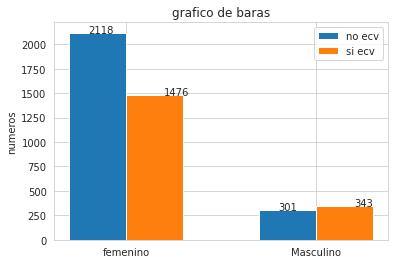

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

print("******")
print(' sexo ')
print("******")

print("--------------------------")
print('esto dice la data original')
print("--------------------------")


etiquetas=["femenino","Masculino"]
valores=[2118,301]
valores2=[1476,343]
#
co=np.arange(len(valores))
an=0.3
#

#
fig,ax=plt.subplots()
ax.bar(co-an/2,valores,an,label='no ecv')
ax.bar(co+an/2,valores2,an,label='si ecv')
# 
for i,j in zip(co,valores):
    ax.annotate(j,xy=(i-0.2,j+0.1))
    
for i,j in zip(co,valores2):
    ax.annotate(j,xy=(i+0.2,j+0.2))    
#
ax.set_title('grafico de baras')
ax.set_ylabel('numeros')
ax.set_xticks(co)
ax.set_xticklabels(etiquetas)
plt.legend()

In [ ]:
#-------------------#
# grafico de barras #
#-------------------#

# paso 1 #
#--------#
x1.groupby(['target_predicho','sexo_1']).agg({'target_predicho':'count'})

target_predicho
target_predicho sexo_1                 
0               0                  1695
                1                  1201
1               0                   724
                1                   618

******
 sexo 
******
-------------------
esto dice el modelo
-------------------


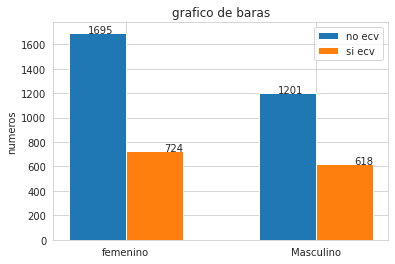

In [ ]:
# paso 2 #
#--------#
import numpy as np
import matplotlib.pyplot as plt

print("******")
print(' sexo ')
print("******")

print("-------------------")
print('esto dice el modelo')
print("-------------------")


etiquetas=["femenino","Masculino"]
valores=[1695,1201]
valores2=[724,618]
#
co=np.arange(len(valores))
an=0.3
#
fig,ax=plt.subplots()
ax.bar(co-an/2,valores,an,label='no ecv')
ax.bar(co+an/2,valores2,an,label='si ecv')
# 
for i,j in zip(co,valores):
    ax.annotate(j,xy=(i-0.2,j+0.1))
    
for i,j in zip(co,valores2):
    ax.annotate(j,xy=(i+0.2,j+0.2))    
#
ax.set_title('grafico de baras')
ax.set_ylabel('numeros')
ax.set_xticks(co)
ax.set_xticklabels(etiquetas)
plt.legend()

##### edad_edad_c2

In [ ]:
#--------#
# paso 1 #
#--------#
d.edad_edad_c2.unique()

array([0, 1], dtype=uint8)

In [ ]:
#--------#
# paso 2 #
#--------#
x1.groupby(['target_predicho','edad_edad_c2']).agg({'target_predicho':'count'})

target_predicho
target_predicho edad_edad_c2                 
0               0                        1505
                1                        1391
1               0                         661
                1                         681

In [ ]:
#--------#
# paso 3 #
#--------#
#convertir en numpy 
np.array(x1.groupby(['target_predicho','edad_edad_c2']).agg({'target_predicho':'count'}))

array([[1505],
       [1391],
       [ 661],
       [ 681]])

**************************
           edad           
**************************
--------------------------
esto dice la data original
--------------------------


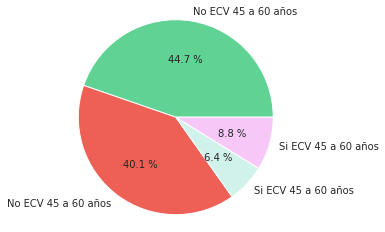

-------------------
esto dice el modelo
-------------------


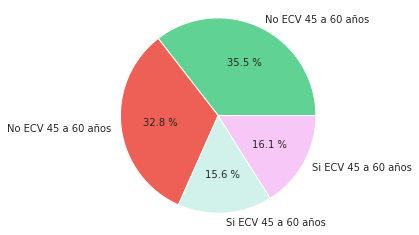

In [ ]:
#30,45,60,75
print("**************************")
print('           edad           ')
print("**************************")

print("--------------------------")
print('esto dice la data original')
print("--------------------------")

import matplotlib.pyplot as plt

numero = np.array(x1.groupby(['target','edad_edad_c2']).agg({'target':'count'})) # c1=categoria 1 de 30 a 45 años,c2= categoria 2 de 45 a 60 años, c3=categoria 3 de 60 a 75. 
nombres = ["No ECV 45 a 60 años","No ECV 45 a 60 años","Si ECV 45 a 60 años","Si ECV 45 a 60 años"]
colores = ["#60D394","#EE6055","#D1F2EB","#F7C8F7"]
plt.pie(numero, labels=nombres, autopct="%0.1f %%", colors=colores)
plt.axis("equal")
plt.show()

print("-------------------")
print('esto dice el modelo')
print("-------------------")


import matplotlib.pyplot as plt

numero = np.array(x1.groupby(['target_predicho','edad_edad_c2']).agg({'target_predicho':'count'})) # c1=categoria 1 de 30 a 45 años,c2= categoria 2 de 45 a 60 años, c3=categoria 3 de 60 a 75. 
nombres = ["No ECV 45 a 60 años","No ECV 45 a 60 años","Si ECV 45 a 60 años","Si ECV 45 a 60 años"]
colores = ["#60D394","#EE6055","#D1F2EB","#F7C8F7"]
plt.pie(numero, labels=nombres, autopct="%0.1f %%", colors=colores)
plt.axis("equal")
plt.show()

In [ ]:
#-------------------#
# grafico de barras #
#-------------------#

# paso 1 #
#--------#
x1.groupby(['target','edad_edad_c2']).agg({'target':'count'})

target
target edad_edad_c2        
0      0               1895
       1               1699
1      0                271
       1                373

**************
 edad_edad_c2 
**************
--------------------------
esto dice la data original
--------------------------


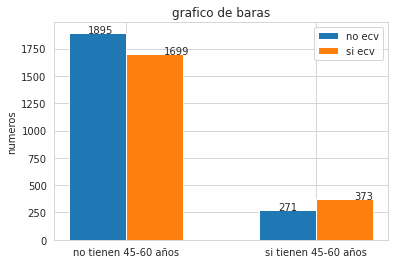

In [ ]:
# paso 2 #
#--------#
import numpy as np
import matplotlib.pyplot as plt

print("**************")
print(' edad_edad_c2 ')
print("**************")

print("--------------------------")
print('esto dice la data original')
print("--------------------------")


etiquetas=["no tienen 45-60 años","si tienen 45-60 años"]
valores=[1895,271]
valores2=[1699,373]
#
co=np.arange(len(valores))
an=0.3
#
fig,ax=plt.subplots()
ax.bar(co-an/2,valores,an,label='no ecv')
ax.bar(co+an/2,valores2,an,label='si ecv')
# 
for i,j in zip(co,valores):
    ax.annotate(j,xy=(i-0.2,j+0.1))
    
for i,j in zip(co,valores2):
    ax.annotate(j,xy=(i+0.2,j+0.2))    
#
ax.set_title('grafico de baras')
ax.set_ylabel('numeros')
ax.set_xticks(co)
ax.set_xticklabels(etiquetas)
plt.legend()

In [ ]:
#-------------------#
# grafico de barras #
#-------------------#

# paso 1 #
#--------#
x1.groupby(['target_predicho','edad_edad_c2']).agg({'target_predicho':'count'})

target_predicho
target_predicho edad_edad_c2                 
0               0                        1505
                1                        1391
1               0                         661
                1                         681

**************
 edad_edad_c2 
**************
-------------------
esto dice el modelo
-------------------


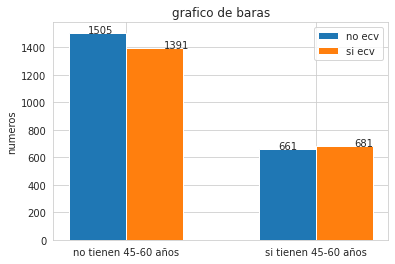

In [ ]:
# paso 2 #
#--------#
import numpy as np
import matplotlib.pyplot as plt

print("**************")
print(' edad_edad_c2 ')
print("**************")

print("-------------------")
print('esto dice el modelo')
print("-------------------")


etiquetas=["no tienen 45-60 años","si tienen 45-60 años"]
valores=[1505,661]
valores2=[1391,681]
#
co=np.arange(len(valores))
an=0.3
#
fig,ax=plt.subplots()
ax.bar(co-an/2,valores,an,label='no ecv')
ax.bar(co+an/2,valores2,an,label='si ecv')
# 
for i,j in zip(co,valores):
    ax.annotate(j,xy=(i-0.2,j+0.1))
    
for i,j in zip(co,valores2):
    ax.annotate(j,xy=(i+0.2,j+0.2))    
#
ax.set_title('grafico de baras')
ax.set_ylabel('numeros')
ax.set_xticks(co)
ax.set_xticklabels(etiquetas)
plt.legend()

##### cigarros por dia

In [ ]:
#--------#
# paso 1 #
#--------#
d.cigarros_por_dia.unique()

array([ 0., 20., 30., 23., 15.,  9., 10.,  5., 35., 43.,  1., 40.,  3.,
        2., 12.,  4., 18., 25., 60., 14., 45.,  8., 50., 13., 11.,  7.,
        6., 38., 29., 17., 16., 19., 70.])

In [ ]:
#--------#
# paso 2 #
#--------#
x1.groupby(['target_predicho']).agg({'cigarros_por_dia':'count'})

,cigarros_por_dia
target_predicho,
0,2896
1,1342


In [ ]:
x1.groupby(['target']).agg({'cigarros_por_dia':'count'})

,cigarros_por_dia
target,
0,3594
1,644


In [ ]:
#--------#
# paso 3 #
#--------#
#convertir en numpy 
np.array(x1.groupby(['target_predicho']).agg({'cigarros_por_dia':'count'}))

array([[2896],
       [1342]])

**************************
   cigarros por dia       
**************************
--------------------------
esto dice la data original
--------------------------


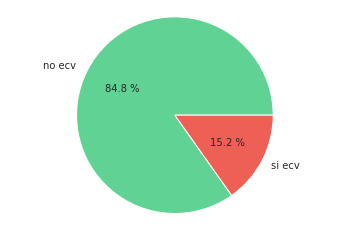

-------------------
esto dice el modelo
-------------------


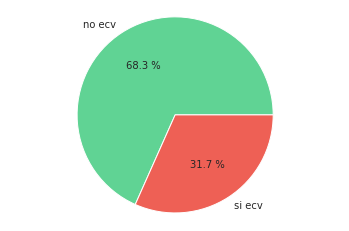

In [ ]:
#30,45,60,75
print("**************************")
print('   cigarros por dia       ')
print("**************************")

print("--------------------------")
print('esto dice la data original')
print("--------------------------")

import matplotlib.pyplot as plt

numero = np.array(x1.groupby(['target']).agg({'cigarros_por_dia':'count'})) # c1=categoria 1 de 30 a 45 años,c2= categoria 2 de 45 a 60 años, c3=categoria 3 de 60 a 75. 
nombres = ["no ecv ","si ecv"]
colores = ["#60D394","#EE6055"]
plt.pie(numero, labels=nombres, autopct="%0.1f %%", colors=colores)
plt.axis("equal")
plt.show()

print("-------------------")
print('esto dice el modelo')
print("-------------------")


import matplotlib.pyplot as plt

numero = np.array(x1.groupby(['target_predicho']).agg({'cigarros_por_dia':'count'})) # c1=categoria 1 de 30 a 45 años,c2= categoria 2 de 45 a 60 años, c3=categoria 3 de 60 a 75. 
nombres = ["no ecv","si ecv"]
colores = ["#60D394","#EE6055"]
plt.pie(numero, labels=nombres, autopct="%0.1f %%", colors=colores)
plt.axis("equal")
plt.show()

##### Presion arterial sistolica

In [ ]:
#--------#
# paso 1 #
#--------#
x1.presion_arterial_sistolica.unique()

array([106. , 121. , 127.5, 150. , 130. , 175. , 138. , 100. , 141.5,
       162. , 133. , 131. , 142. , 124. , 114. , 140. , 112. , 122. ,
       139. , 108. , 123.5, 148. , 132. , 137.5, 102. , 110. , 115. ,
       134. , 147. , 124.5, 153.5, 160. , 153. , 111. , 116.5,  97. ,
       119. , 116. , 156.5, 145. , 143.5, 158. , 157. , 126.5, 136. ,
       154. , 107. , 112.5, 164.5, 138.5, 155. , 151. , 152. , 113. ,
       132.5, 126. , 123. , 141. , 135. , 127. , 160.5, 105. , 109. ,
       128. , 118. , 109.5, 117.5, 149. , 136.5, 125. , 121.5, 173. ,
       144. , 129.5, 117. , 144.5, 170. , 137. , 119.5, 143. , 166. ,
       139.5, 129. , 159. , 130.5, 107.5, 168. , 146. , 174. , 122.5,
        98. , 131.5, 101. , 158.5, 151.5,  97.5, 120. , 157.5, 140.5,
       171. , 156. , 165. , 146.5, 113.5, 152.5, 162.5, 108.5, 103. ,
       145.5, 134.5, 115.5, 118.5, 174.5, 163. , 164. , 120.5,  98.5,
       161. , 168.5, 163.5, 128.5, 167. , 167.5, 172.5, 147.5, 142.5,
       159.5, 102.5,

In [ ]:
#--------#
# paso 2 #
#--------#
x1.groupby(['target_predicho']).agg({'presion_arterial_sistolica':'count'})

,presion_arterial_sistolica
target_predicho,
0,2896
1,1342


In [ ]:
x1.groupby(['target']).agg({'presion_arterial_sistolica':'count'})

,presion_arterial_sistolica
target,
0,3594
1,644


In [ ]:
#--------#
# paso 3 #
#--------#
#convertir en numpy 
np.array(x1.groupby(['target_predicho']).agg({'presion_arterial_sistolica':'count'}))

array([[2896],
       [1342]])

**************************
presion_arterial_sistolica
**************************
--------------------------
esto dice la data original
--------------------------


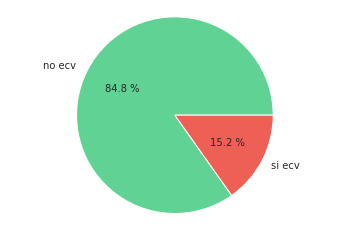

-------------------
esto dice el modelo
-------------------


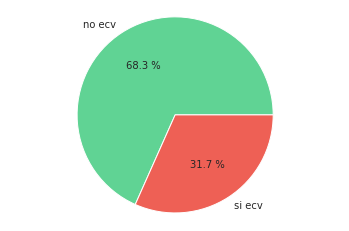

In [ ]:
#--------#
# paso 4 #
#--------#
print("**************************")
print('presion_arterial_sistolica')
print("**************************")

print("--------------------------")
print('esto dice la data original')
print("--------------------------")

import matplotlib.pyplot as plt

numero = np.array(x1.groupby(['target']).agg({'presion_arterial_sistolica':'count'})) # c1=categoria 1 de 30 a 45 años,c2= categoria 2 de 45 a 60 años, c3=categoria 3 de 60 a 75. 
nombres = ["no ecv ","si ecv"]
colores = ["#60D394","#EE6055"]
plt.pie(numero, labels=nombres, autopct="%0.1f %%", colors=colores)
plt.axis("equal")
plt.show()

print("-------------------")
print('esto dice el modelo')
print("-------------------")


import matplotlib.pyplot as plt

numero = np.array(x1.groupby(['target_predicho']).agg({'presion_arterial_sistolica':'count'})) # c1=categoria 1 de 30 a 45 años,c2= categoria 2 de 45 a 60 años, c3=categoria 3 de 60 a 75. 
nombres = ["no ecv","si ecv"]
colores = ["#60D394","#EE6055"]
plt.pie(numero, labels=nombres, autopct="%0.1f %%", colors=colores)
plt.axis("equal")
plt.show()

##### presion_arterial_diastolica

In [ ]:
#--------#
# paso 1 #
#--------#
x1.presion_arterial_diastolica.unique()

array([ 70.   ,  81.   ,  80.   ,  95.   ,  84.   , 104.575,  71.   ,
        89.   ,  76.   ,  88.   ,  94.   ,  64.   ,  90.   ,  78.   ,
        84.5  ,  70.5  ,  77.5  ,  82.   ,  68.   ,  72.5  ,  91.   ,
        85.5  ,  85.   ,  82.5  ,  74.   ,  92.5  , 102.   ,  98.   ,
       101.   ,  73.   ,  92.   ,  83.5  ,  63.   ,  69.   ,  93.   ,
        66.   ,  75.   ,  79.   ,  87.   ,  99.   ,  60.   ,  67.5  ,
        86.5  , 104.   ,  86.   ,  61.5  ,  71.5  ,  76.5  ,  77.   ,
        88.5  ,  96.   ,  97.   , 100.   ,  81.5  ,  80.5  ,  61.   ,
        83.   ,  67.   ,  74.5  ,  66.5  ,  65.   ,  72.   ,  99.5  ,
        78.5  , 104.5  ,  89.5  ,  75.5  ,  97.5  ,  69.5  ,  95.5  ,
        96.5  ,  64.5  ,  68.5  ,  98.5  ,  62.   , 103.   ,  73.5  ,
        87.5  ,  93.5  ,  90.5  ,  62.5  ,  94.5  ,  79.5  ,  91.5  ,
       102.5  ,  65.5  , 103.5  ,  63.5  , 100.5  , 101.5  ,  60.5  ])

In [ ]:
#--------#
# paso 2 #
#--------#
x1.groupby(['target_predicho']).agg({'presion_arterial_diastolica':'count'})

,presion_arterial_diastolica
target_predicho,
0,2896
1,1342


In [ ]:
#--------#
# paso 3 #
#--------#
#convertir en numpy 
np.array(x1.groupby(['target_predicho']).agg({'presion_arterial_diastolica':'count'}))

array([[2896],
       [1342]])

**************************
presion_arterial_diastolica
**************************
--------------------------
esto dice la data original
--------------------------


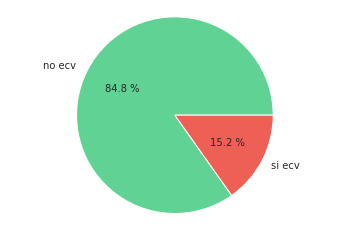

-------------------
esto dice el modelo
-------------------


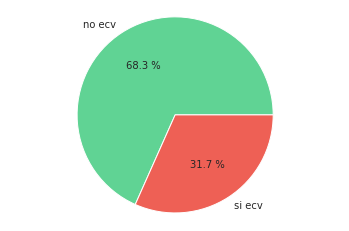

In [ ]:
#--------#
# paso 4 #
#--------#
print("**************************")
print('presion_arterial_diastolica')
print("**************************")

print("--------------------------")
print('esto dice la data original')
print("--------------------------")

import matplotlib.pyplot as plt

numero = np.array(x1.groupby(['target']).agg({'presion_arterial_diastolica':'count'})) # c1=categoria 1 de 30 a 45 años,c2= categoria 2 de 45 a 60 años, c3=categoria 3 de 60 a 75. 
nombres = ["no ecv ","si ecv"]
colores = ["#60D394","#EE6055"]
plt.pie(numero, labels=nombres, autopct="%0.1f %%", colors=colores)
plt.axis("equal")
plt.show()

print("-------------------")
print('esto dice el modelo')
print("-------------------")


import matplotlib.pyplot as plt

numero = np.array(x1.groupby(['target_predicho']).agg({'presion_arterial_diastolica':'count'})) # c1=categoria 1 de 30 a 45 años,c2= categoria 2 de 45 a 60 años, c3=categoria 3 de 60 a 75. 
nombres = ["no ecv","si ecv"]
colores = ["#60D394","#EE6055"]
plt.pie(numero, labels=nombres, autopct="%0.1f %%", colors=colores)
plt.axis("equal")
plt.show()

##### imc

In [ ]:
#--------#
# paso 1 #
#--------#
x1.imc.unique()

array([26.97, 28.73, 25.34, ..., 27.11, 30.48, 26.7 ])

In [ ]:
#--------#
# paso 2 #
#--------#
x1.groupby(['target_predicho']).agg({'imc':'count'})

,imc
target_predicho,
0,2896
1,1342


In [ ]:
#--------#
# paso 3 #
#--------#
#convertir en numpy 
np.array(x1.groupby(['target_predicho']).agg({'imc':'count'}))

array([[2896],
       [1342]])

**************************
presion_arterial_diastolica
**************************
--------------------------
esto dice la data original
--------------------------


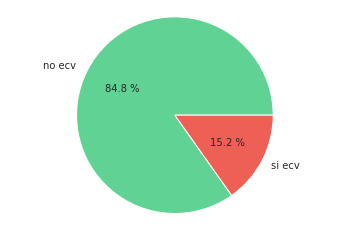

-------------------
esto dice el modelo
-------------------


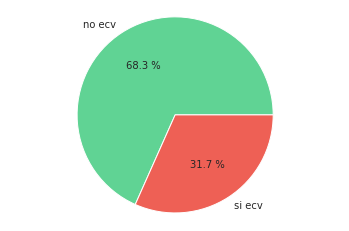

In [ ]:
#--------#
# paso 4 #
#--------#
print("**************************")
print('presion_arterial_diastolica')
print("**************************")

print("--------------------------")
print('esto dice la data original')
print("--------------------------")

import matplotlib.pyplot as plt

numero = np.array(x1.groupby(['target']).agg({'imc':'count'})) # c1=categoria 1 de 30 a 45 años,c2= categoria 2 de 45 a 60 años, c3=categoria 3 de 60 a 75. 
nombres = ["no ecv ","si ecv"]
colores = ["#60D394","#EE6055"]
plt.pie(numero, labels=nombres, autopct="%0.1f %%", colors=colores)
plt.axis("equal")
plt.show()

print("-------------------")
print('esto dice el modelo')
print("-------------------")


import matplotlib.pyplot as plt

numero = np.array(x1.groupby(['target_predicho']).agg({'imc':'count'})) # c1=categoria 1 de 30 a 45 años,c2= categoria 2 de 45 a 60 años, c3=categoria 3 de 60 a 75. 
nombres = ["no ecv","si ecv"]
colores = ["#60D394","#EE6055"]
plt.pie(numero, labels=nombres, autopct="%0.1f %%", colors=colores)
plt.axis("equal")
plt.show()

In [ ]:
lista_boruta

['cigarros_por_dia',
 'presion_arterial_sistolica',
 'presion_arterial_diastolica',
 'imc',
 'frecuencia_cardiaca',
 'glucosa',
 'sexo_1',
 'nivel_de_colesterol',
 'edad_edad_c2',
 'target']

In [ ]:
!jupyter nbconvert --to html    /content/1_Enfermedades_Cardiovasculares.ipynb

[NbConvertApp] Converting notebook /content/1_Enfermedades_Cardiovasculares.ipynb to html
[NbConvertApp] Writing 1760925 bytes to /content/1_Enfermedades_Cardiovasculares.html
